<a href="https://colab.research.google.com/github/meetmehedi/datas/blob/main/NSU_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/content/2013-Now.csv", skiprows=1)

In [ ]:
data.head()

2025-06-20T18:09:47.020Z  31.2787  138.5079  351.874  4.4   mb    60  \
0  2025-06-19T07:37:03.823Z  33.6852  139.5637   10.000  4.7   mb  63.0   
1  2025-06-18T12:30:11.812Z  32.0824  131.8638   41.538  4.8   mb  69.0   
2  2025-06-17T02:07:22.846Z  34.4738  140.1843  113.642  4.2   mb  26.0   
3  2025-06-13T06:18:29.604Z  35.6126  140.1869   66.484  4.5   mb  40.0   
4  2025-06-12T03:49:20.265Z  33.4726  138.1490   10.000  4.9  mww  78.0   

      98   2.14   0.8  ...  2025-06-20T19:06:15.040Z  \
0  109.0  0.606  0.93  ...  2025-06-19T13:11:21.040Z   
1   91.0  1.330  1.26  ...  2025-06-18T12:47:45.040Z   
2  135.0  1.390  0.72  ...  2025-06-17T02:28:22.040Z   
3  131.0  1.851  0.72  ...  2025-06-13T07:39:03.817Z   
4   49.0  1.439  0.83  ...  2025-06-12T04:05:42.040Z   

       Izu Islands, Japan region  earthquake  9.47  7.674  0.051    112  \
0   123 km SSE of Shimoda, Japan  earthquake  5.59  1.888  0.089   38.0   
1      33 km ESE of Tsunō, Japan  earthquake  6.47  7.393  0.079   49.0   
2   63 km SSE of Tateyama, Japan  earthquake  9.38  8.917  0.136   15.0   
3  4 km SSE of Yotsukaidō, Japan  earthquake  7.78  7.804  0.050  119.0   
4       125 km S of Ōyama, Japan  earthquake  4.92  1.844  0.080   15.0   

   reviewed  us.1 us.2  
0  reviewed    us   us  
1  reviewed    us   us  
2  reviewed    us   us  
3  reviewed    us   us  
4  reviewed    us   us  

[5 rows x 22 columns]

In [ ]:
data.tail()

2025-06-20T18:09:47.020Z  31.2787  138.5079  351.874  4.4  mb     60  \
2564  2013-01-26T00:14:39.020Z   36.381   139.747    117.3  4.2  mb   63.0   
2565  2013-01-21T19:46:58.580Z   35.776   140.735     18.6  4.9  mb  237.0   
2566  2013-01-14T16:20:04.770Z   36.122   136.996    266.9  4.5  mb   26.0   
2567  2013-01-07T23:25:32.740Z   31.186   139.481     35.0  4.7  mb   39.0   
2568  2013-01-04T04:42:47.840Z   35.661   140.618     39.9  4.6  mb  120.0   

         98  2.14   0.8  ...  2025-06-20T19:06:15.040Z  \
2564  120.6   NaN  0.96  ...  2014-11-07T01:49:53.345Z   
2565   46.5   NaN  0.96  ...  2022-08-06T13:18:05.848Z   
2566  112.3   NaN  0.76  ...  2014-11-07T01:49:50.090Z   
2567   83.4   NaN  1.49  ...  2014-11-07T01:49:47.503Z   
2568  110.2   NaN  0.74  ...  2015-03-24T02:26:01.799Z   

       Izu Islands, Japan region  earthquake 9.47 7.674  0.051    112  \
2564  1 km ESE of Tochigi, Japan  earthquake  NaN   4.4    NaN   12.0   
2565  10 km WNW of Hasaki, Japan  earthquake  NaN  13.4    NaN  157.0   
2566  22 km W of Takayama, Japan  earthquake  NaN   4.1    NaN   10.0   
2567   Izu Islands, Japan region  earthquake  NaN   NaN    NaN    4.0   
2568    6 km SSW of Asahi, Japan  earthquake  NaN   4.4    NaN   52.0   

      reviewed  us.1 us.2  
2564  reviewed    us   us  
2565  reviewed    us   us  
2566  reviewed    us   us  
2567  reviewed    us   us  
2568  reviewed    us   us  

[5 rows x 22 columns]

In [ ]:
data.shape

(2569, 22)

In [ ]:
columns = ['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
           'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
           'horizontalError', 'depthError', 'magError', 'magNst', 'status',
           'locationSource', 'magSource']

data = pd.read_csv("/content/2013-Now.csv", header=None, names=columns, skiprows=1)

In [ ]:
# Consolidate classification model performance for comparison

print("\n--- Comparison of Classification Model Performance ---")

classification_results = []

# --- Prepare classification data (moved here to ensure availability) ---
# Assuming 'data' DataFrame is already loaded and preprocessed with 'is_strong' target

if 'data' in locals() and 'is_strong' in data.columns:
    classification_threshold = 5.0 # Ensure this is consistent if used elsewhere
    # data['is_strong'] = (data['mag'] >= classification_threshold).astype(int) # Assuming this is already done

    features_classification = ['latitude', 'longitude', 'depth', 'hour', 'day', 'month', 'year'] # Ensure these features are consistent
    X_classification = data[features_classification].select_dtypes(include=np.number).copy()
    y_classification = data['is_strong']

    if not X_classification.empty:
        # Split data for classification
        X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
            X_classification, y_classification, test_size=0.2, random_state=42, stratify=y_classification # Stratify for imbalanced classes
        )

        # Impute missing values for classification features
        imputer_cls = SimpleImputer(strategy='mean')
        X_train_imputed_cls = imputer_cls.fit_transform(X_train_cls)
        X_test_imputed_cls = imputer_cls.transform(X_test_cls)

        # Scale classification features
        scaler_cls = StandardScaler()
        scaler_cls.fit(X_train_imputed_cls)
        X_train_scaled_cls = scaler_cls.transform(X_train_imputed_cls)
        X_test_scaled_cls = scaler_cls.transform(X_test_imputed_cls)

        print("\nClassification data prepared for comparison.")

        # --- Add MLP Classifier results ---
        if 'y_pred_mlp_cls' in locals() and 'y_pred_proba_mlp_cls' in locals() and len(np.unique(y_test_cls)) == 2:
            try:
                mlp_report = classification_report(y_test_cls, y_pred_mlp_cls, output_dict=True)
                mlp_auc = roc_auc_score(y_test_cls, y_pred_proba_mlp_cls)
                classification_results.append({
                    "Model": "MLP Classifier",
                    "Accuracy": round(mlp_report['accuracy'], 4),
                    "Precision (Weighted Avg)": round(mlp_report['weighted avg']['precision'], 4),
                    "Recall (Weighted Avg)": round(mlp_report['weighted avg']['recall'], 4),
                    "F1-Score (Weighted Avg)": round(mlp_report['weighted avg']['f1-score'], 4),
                    "ROC AUC": round(mlp_auc, 4)
                })
            except Exception as e:
                print(f"Could not add MLP Classifier results: {e}")
        elif len(np.unique(y_test_cls)) > 2:
            print("\nMLP Classifier was run on multi-class data. Including basic metrics:")
            try:
                # Need y_pred_mlp_cls from the MLP training step
                if 'y_pred_mlp_cls' in locals():
                    mlp_report = classification_report(y_test_cls, y_pred_mlp_cls, output_dict=True)
                    classification_results.append({
                        "Model": "MLP Classifier",
                        "Accuracy": round(mlp_report['accuracy'], 4),
                        "Precision (Weighted Avg)": round(mlp_report['weighted avg']['precision'], 4),
                        "Recall (Weighted Avg)": round(mlp_report['weighted avg']['recall'], 4),
                        "F1-Score (Weighted Avg)": round(mlp_report['weighted avg']['f1-score'], 4),
                        "ROC AUC": "N/A (Multi-class)"
                    })
                else:
                    print("MLP Classifier predictions (y_pred_mlp_cls) not found for multi-class evaluation.")
            except Exception as e:
                print(f"Could not add MLP Classifier results (multi-class): {e}")
        else:
            print("MLP Classifier results not found or target is not suitable for ROC AUC.")


        # Add other classification model results (assuming they were run and results are available)
        # Retrieve from the `classification_models` dictionary and evaluate again or assume results are stored
        # For simplicity, re-evaluating here assuming the scaled data is available
        if 'classification_models' in locals():
            for name, model in classification_models.items():
                if name != "MLP Classifier": # Avoid adding MLP twice
                    try:
                        y_pred = model.predict(X_test_scaled_cls)
                        report = classification_report(y_test_cls, y_pred, output_dict=True)

                        auc = "N/A"
                        if hasattr(model, "predict_proba") and len(np.unique(y_test_cls)) == 2:
                             y_proba = model.predict_proba(X_test_scaled_cls)[:, 1]
                             auc = round(roc_auc_score(y_test_cls, y_proba), 4)
                        elif len(np.unique(y_test_cls)) > 2:
                            auc = "N/A (Multi-class)"


                        classification_results.append({
                            "Model": name,
                            "Accuracy": round(report['accuracy'], 4),
                            "Precision (Weighted Avg)": round(report['weighted avg']['precision'], 4),
                            "Recall (Weighted Avg)": round(report['weighted avg']['recall'], 4),
                            "F1-Score (Weighted Avg)": round(report['weighted avg']['f1-score'], 4),
                            "ROC AUC": auc
                        })
                    except Exception as e:
                        print(f"Error adding results for {name}: {e}")

        else:
            print("\nPrevious classification model results not found. Please ensure the relevant cells were executed.")


        # Convert to DataFrame and print
        if classification_results:
            results_df = pd.DataFrame(classification_results)
            # Sort by ROC AUC if available and not all "N/A", otherwise by Accuracy
            if "ROC AUC" in results_df.columns and not results_df['ROC AUC'].isin(['N/A', 'N/A (Multi-class)']).all():
                 results_df['ROC AUC'] = pd.to_numeric(results_df['ROC AUC'], errors='coerce')
                 print(results_df.sort_values(by="ROC AUC", ascending=False).to_markdown(index=False))
            else:
                 print(results_df.sort_values(by="Accuracy", ascending=False).to_markdown(index=False))
        else:
            print("No classification model results were collected.")
    else:
        print("Error: No valid numeric features for classification were found to prepare data.")
else:
    print("Error: 'data' DataFrame or 'is_strong' column not found to prepare classification data.")


--- Comparison of Classification Model Performance ---
Error: 'data' DataFrame or 'is_strong' column not found to prepare classification data.


In [ ]:
data.min()

time               2013-01-04T04:42:47.840Z
latitude                            30.9008
longitude                          130.8069
depth                                  1.61
mag                                     2.7
magType                                  mb
nst                                     9.0
gap                                    10.0
dmin                                  0.038
rms                                    0.04
net                                      us
id                               us10001m4z
updated            2013-10-12T21:32:32.000Z
place              0 km N of Matsudo, Japan
type                             earthquake
horizontalError                         1.5
depthError                              0.0
magError                               0.02
magNst                                  1.0
status                             reviewed
locationSource                           us
magSource                              gcmt
dtype: object

In [ ]:
data.max()

time               2025-06-20T18:09:47.020Z
latitude                            42.0509
longitude                          140.9987
depth                                510.33
mag                                     7.5
magType                                 mww
nst                                   619.0
gap                                   254.0
dmin                                  5.784
rms                                    1.55
net                                      us
id                               usp000k281
updated            2025-06-23T22:42:02.040Z
place                 western Honshu, Japan
type                             earthquake
horizontalError                        15.3
depthError                             38.2
magError                              0.555
magNst                                801.0
status                             reviewed
locationSource                           us
magSource                                us
dtype: object

In [ ]:
print(data['mag'].unique())

[4.4 4.7 4.8 4.2 4.5 4.9 4.3 4.1 4.6 3.8 4.  5.8 5.3 5.2 6.8 5.6 3.9 6.1
 5.  5.5 5.1 5.7 6.3 5.9 5.4 6.2 7.5 2.7 3.1 3.7 3.2 3.4 6.4 3.3 3.6 6. ]


In [ ]:
data.keys()

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

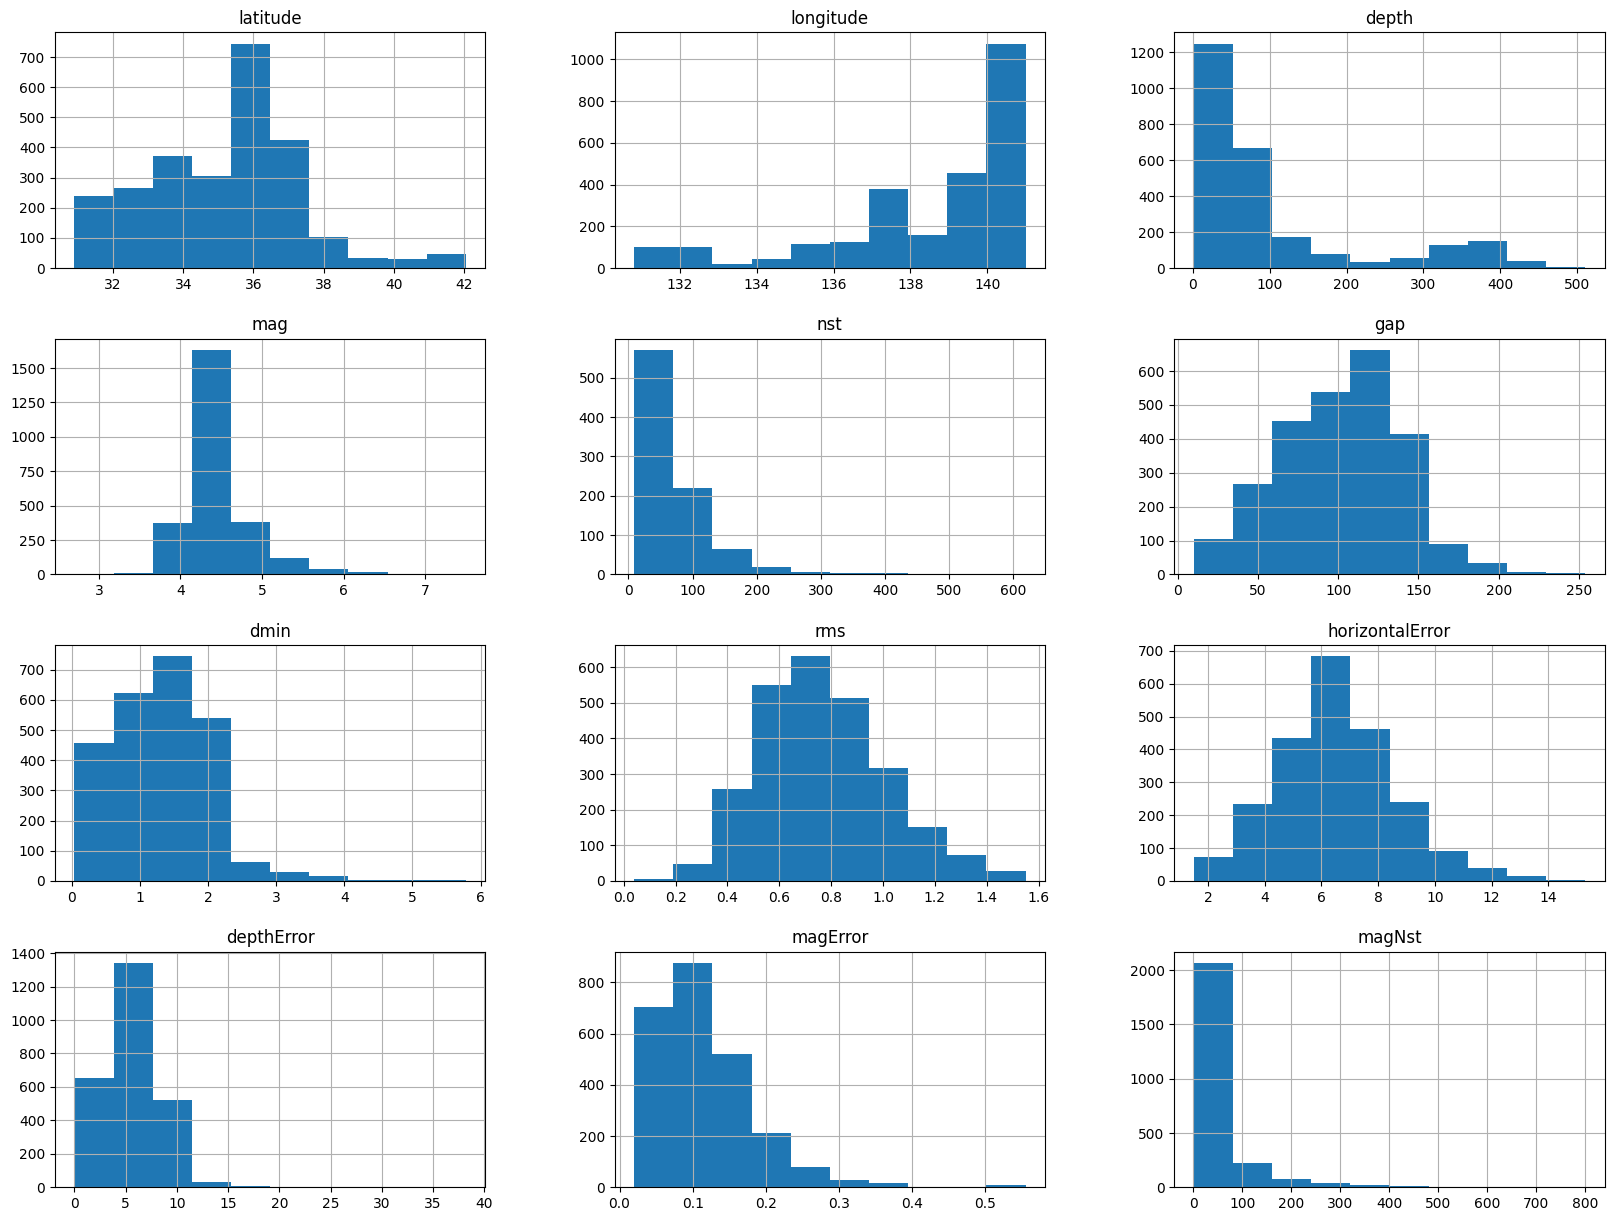

In [ ]:
data. hist (figsize=(20,15))
plt.show()

In [ ]:
data.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1678
gap                   0
dmin                 92
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError     302
depthError           15
magError            120
magNst              113
status                0
locationSource        0
magSource             0
dtype: int64

In [ ]:
data_clean = data.dropna()


In [ ]:
data['nst'] = data['nst'].fillna(0)


In [ ]:
data['dmin'] = data['dmin'].fillna(data['dmin'].median())
data['horizontalError'] = data['horizontalError'].fillna(data['horizontalError'].mean())
data['depthError'] = data['depthError'].fillna(data['depthError'].median())
data['magError'] = data['magError'].fillna(data['magError'].mean())
data['magNst'] = data['magNst'].fillna(0)


In [ ]:
data.isnull().sum()

time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

scaler = StandardScaler()

numeric_cols = data.select_dtypes(include=np.number).columns
data_numeric = data[numeric_cols].copy()

if data_numeric.empty:
    print("Error: No numeric columns found in the DataFrame to scale.")
else:
    data_s = scaler.fit_transform(data_numeric)
    print("Data scaled successfully.")

    sc_data = pd.DataFrame(data_s, columns=data_numeric.columns)
    display(sc_data.head())

Data scaled successfully.


latitude  longitude     depth       mag       nst       gap      dmin  \
0 -1.789652   0.002820  2.180948 -0.198536  0.713310 -0.090903  1.185788   
1 -0.682576   0.412304 -0.763291  0.599958  0.773446  0.201193 -1.023016   
2 -1.419921  -2.574045 -0.491683  0.866123  0.893718 -0.276782  0.019471   
3 -0.319792   0.652999  0.129280 -0.730865  0.031768  0.891601  0.105864   
4  0.204097   0.654008 -0.276847  0.067629  0.312403  0.785385  0.769658   

        rms  horizontalError  depthError  magError    magNst  
0  0.138790         1.508206    0.713014 -0.994986  0.812756  
1  0.679798        -0.491244   -1.317424 -0.418152 -0.123396  
2  2.053126        -0.037761    0.614405 -0.569950  0.015762  
3 -0.194138         1.461827    1.149211  0.295301 -0.414362  
4 -0.194138         0.637311    0.758634 -1.010166  0.901311

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

target_column = 'mag'

if target_column not in data.columns:
    print(f"Error: '{target_column}' column not found in the original DataFrame. Please check column names.")
else:
    X = data.drop(columns=[target_column])
    y = data[target_column]

    X_numeric = X.select_dtypes(include=np.number).copy()

    if X_numeric.empty:
        print("Error: No numeric columns found in features (X). Cannot proceed with scaling or model training.")


        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        print("Data split without numeric features.")
    else:
        X_train_numeric, X_test_numeric, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)


        imputer = SimpleImputer(strategy='mean')
        X_train_imputed = imputer.fit_transform(X_train_numeric)
        X_test_imputed = imputer.transform(X_test_numeric)
        print("Missing values imputed successfully using the mean of the training data.")


        scaler = StandardScaler()
        scaler.fit(X_train_imputed)

        X_train_scaled = scaler.transform(X_train_imputed)
        X_test_scaled = scaler.transform(X_test_imputed)



        print("\nData split, imputed, and scaled.")
        print("Training feature shape:", X_train_scaled.shape)
        print("Testing feature shape:", X_test_scaled.shape)
        print("Training target shape:", y_train.shape)
        print("Testing target shape:", y_test.shape)

Missing values imputed successfully using the mean of the training data.

Data split, imputed, and scaled.
Training feature shape: (2056, 11)
Testing feature shape: (514, 11)
Training target shape: (2056,)
Testing target shape: (514,)



Model Evaluation:
Mean Squared Error (MSE): 0.08
R-squared (R2): 0.41

EDA on Target Variable (y_train):
count    2056.000000
mean        4.474805
std         0.376561
min         3.100000
25%         4.200000
50%         4.400000
75%         4.600000
max         7.500000
Name: mag, dtype: float64


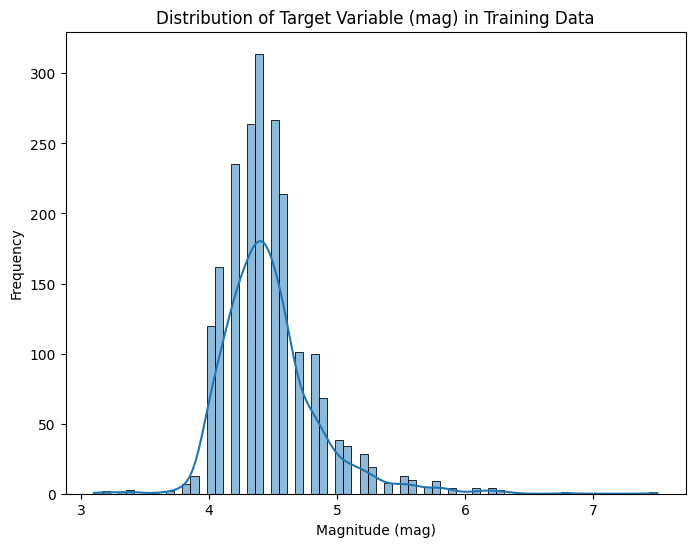

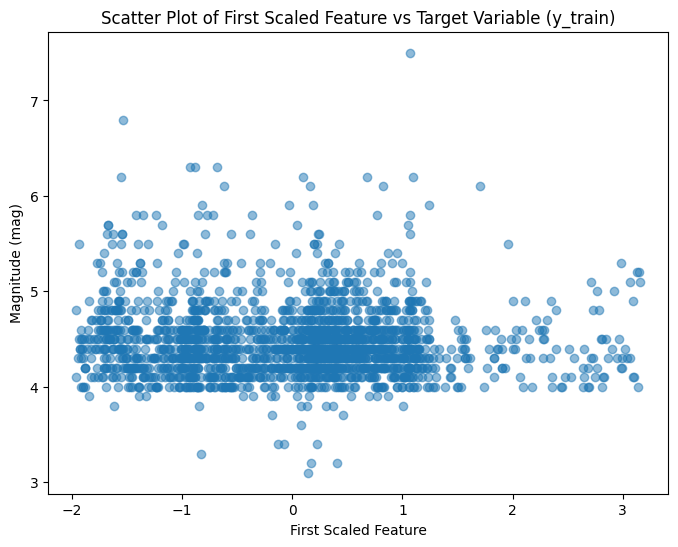

In [ ]:

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


print("\nEDA on Target Variable (y_train):")
print(y_train.describe())
plt.figure(figsize=(8, 6))
sns.histplot(y_train, kde=True)
plt.title('Distribution of Target Variable (mag) in Training Data')
plt.xlabel('Magnitude (mag)')
plt.ylabel('Frequency')
plt.show()

if X_train_scaled.shape[1] > 0:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train_scaled[:, 0], y_train, alpha=0.5)
    plt.title('Scatter Plot of First Scaled Feature vs Target Variable (y_train)')
    plt.xlabel('First Scaled Feature')
    plt.ylabel('Magnitude (mag)')
    plt.show()
else:
    print("No scaled features available to plot against the target variable.")




Model Evaluation:
Mean Squared Error (MSE): 0.08
R-squared (R2): 0.41


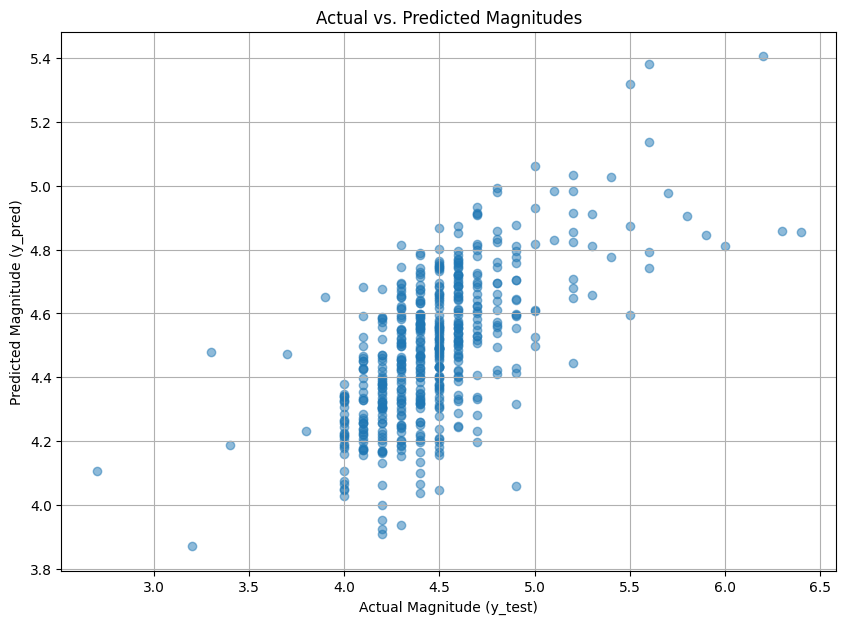

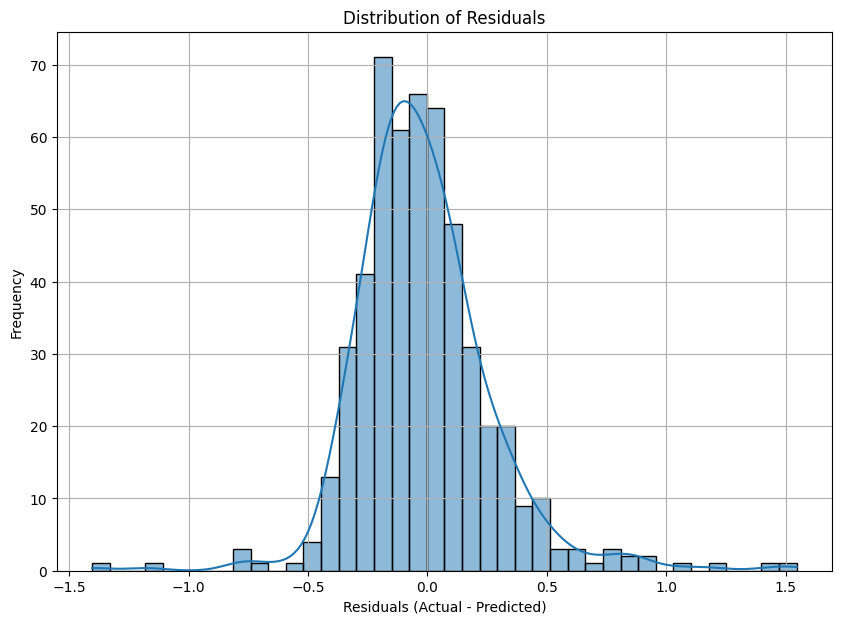

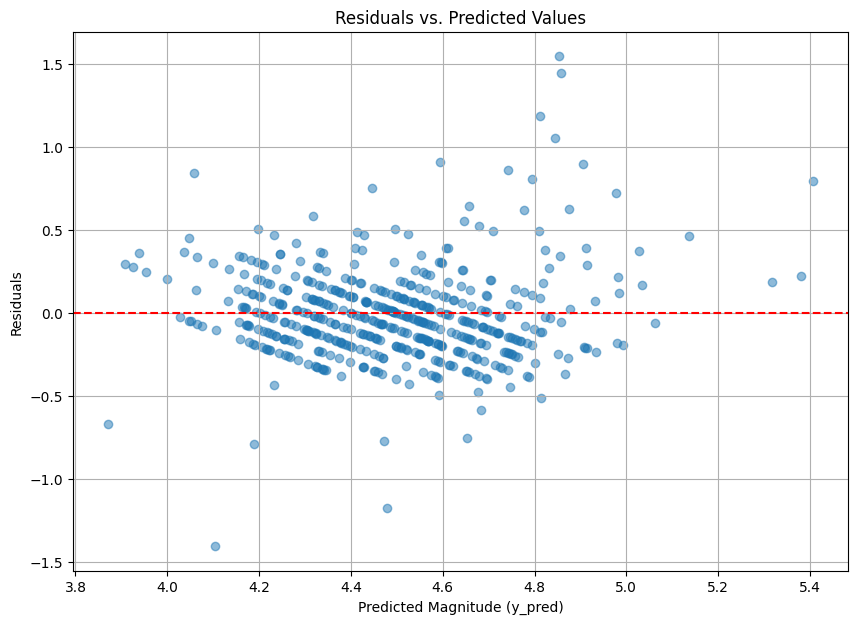

In [ ]:


import matplotlib.pyplot as plt

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Magnitude (y_test)")
plt.ylabel("Predicted Magnitude (y_pred)")
plt.title("Actual vs. Predicted Magnitudes")
plt.grid(True)
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 7))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 7))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Predicted Magnitude (y_pred)")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()


Missing values imputed successfully using the mean of the training data.

Data split, imputed, and scaled with engineered features.
Training feature shape: (2056, 7)
Testing feature shape: (514, 7)
Training target shape: (2056,)
Testing target shape: (514,)

Model Evaluation (with engineered features):
Mean Squared Error (MSE): 0.13
R-squared (R2): 0.06


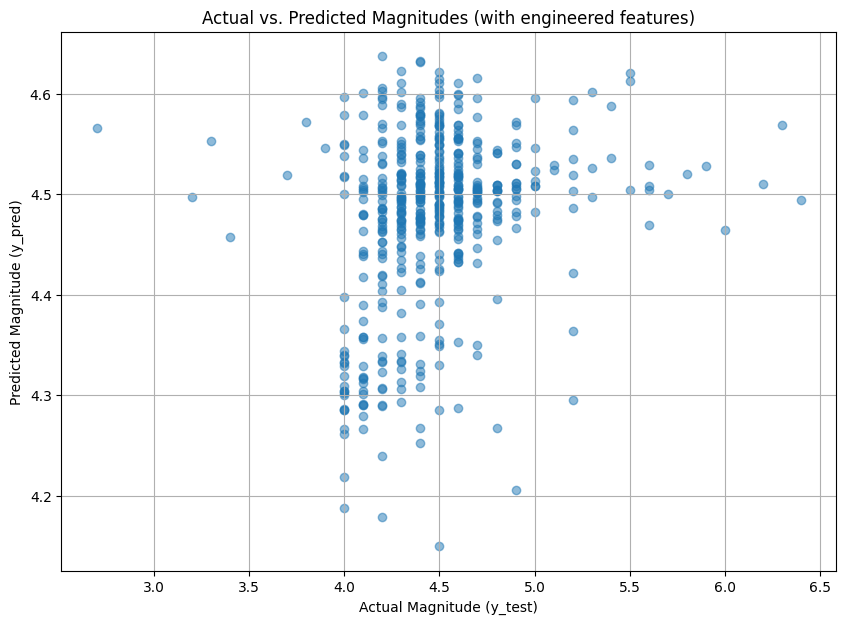

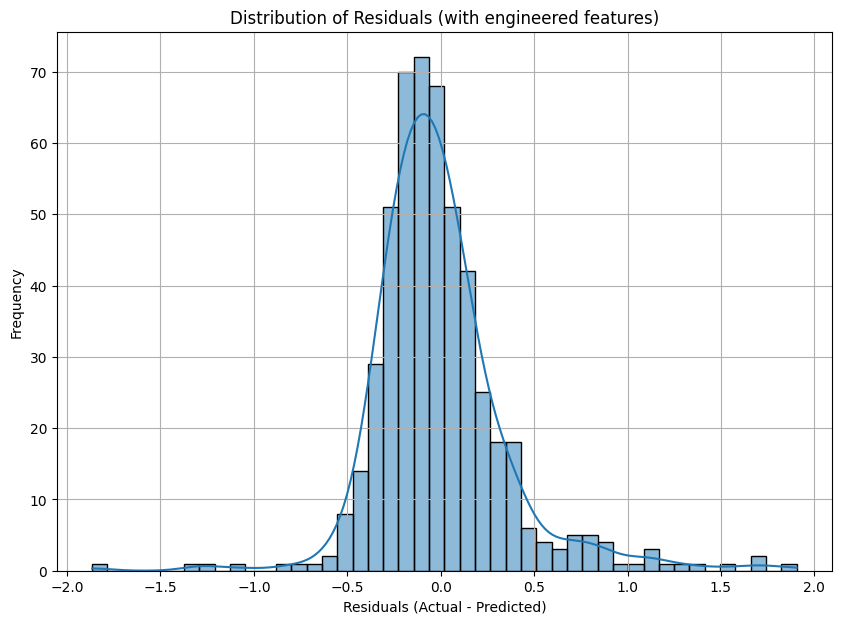

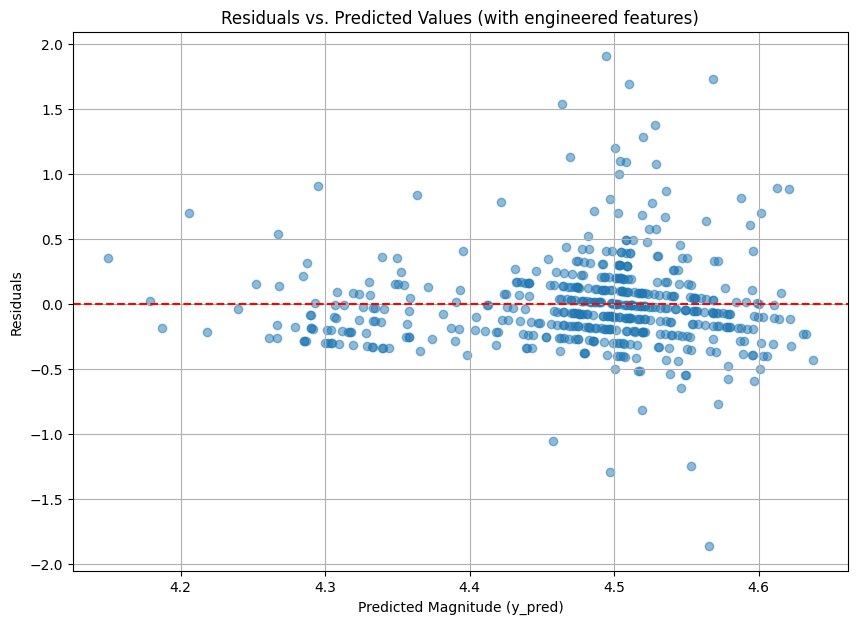

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# --- Feature Engineering ---

# Create time features
data['time'] = pd.to_datetime(data['time'])
data['hour'] = data['time'].dt.hour
data['day'] = data['time'].dt.day
data['month'] = data['time'].dt.month
data['year'] = data['time'].dt.year

# Categorize magnitude levels (example: define bins for magnitude)
# You can adjust the bins based on the distribution of magnitudes in your data
magnitude_bins = [0, 2.5, 5.0, 7.5, 10.0]
magnitude_labels = ['Low', 'Moderate', 'Strong', 'Very Strong']
data['mag_category'] = pd.cut(data['mag'], bins=magnitude_bins, labels=magnitude_labels, right=False)

# Convert 'mag_category' to a numerical representation if needed for the model
# One-Hot Encoding is a common approach for categorical features
data = pd.get_dummies(data, columns=['mag_category'], prefix='mag')

# Select features for the model
# Include Latitude, Longitude, Depth, Time features, and the one-hot encoded magnitude categories
features = ['latitude', 'longitude', 'depth', 'hour', 'day', 'month', 'year'] + list(data.columns[data.columns.str.startswith('mag_')])
# Ensure 'mag' is not in the features list if it's the target variable
if 'mag' in features:
    features.remove('mag')

X = data[features]
y = data[target_column] # target_column is already defined as 'mag'

# Handle potential non-numeric columns that might have been introduced by one-hot encoding (e.g., the original 'mag_category' column)
X = X.select_dtypes(include=np.number).copy()

# --- Re-run train/test split, imputation, and scaling with new features ---

if not X.empty:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Impute missing values using the mean of the training data
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)
    print("\nMissing values imputed successfully using the mean of the training data.")

    # Scale features
    scaler = StandardScaler()
    scaler.fit(X_train_imputed)

    X_train_scaled = scaler.transform(X_train_imputed)
    X_test_scaled = scaler.transform(X_test_imputed)

    print("\nData split, imputed, and scaled with engineered features.")
    print("Training feature shape:", X_train_scaled.shape)
    print("Testing feature shape:", X_test_scaled.shape)
    print("Training target shape:", y_train.shape)
    print("Testing target shape:", y_test.shape)

    # --- Re-run model training and evaluation ---
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\nModel Evaluation (with engineered features):")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")

    # Re-plot evaluation graphs if desired
    plt.figure(figsize=(10, 7))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("Actual Magnitude (y_test)")
    plt.ylabel("Predicted Magnitude (y_pred)")
    plt.title("Actual vs. Predicted Magnitudes (with engineered features)")
    plt.grid(True)
    plt.show()

    residuals = y_test - y_pred
    plt.figure(figsize=(10, 7))
    sns.histplot(residuals, kde=True)
    plt.xlabel("Residuals (Actual - Predicted)")
    plt.ylabel("Frequency")
    plt.title("Distribution of Residuals (with engineered features)")
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 7))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.xlabel("Predicted Magnitude (y_pred)")
    plt.ylabel("Residuals")
    plt.title("Residuals vs. Predicted Values (with engineered features)")
    plt.axhline(y=0, color='r', linestyle='--')
    plt.grid(True)
    plt.show()

else:
    print("Error: No valid features available after feature engineering.")


Classification: Missing values imputed successfully.

Classification: Data split, imputed, and scaled.
Training feature shape (Classification): (2056, 7)
Testing feature shape (Classification): (514, 7)
Training target shape (Classification): (2056,)
Testing target shape (Classification): (514,)

Logistic Regression Model Evaluation:
Confusion Matrix:
 [[470   0]
 [ 44   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.96       470
           1       0.00      0.00      0.00        44

    accuracy                           0.91       514
   macro avg       0.46      0.50      0.48       514
weighted avg       0.84      0.91      0.87       514

ROC AUC Score: 0.64


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


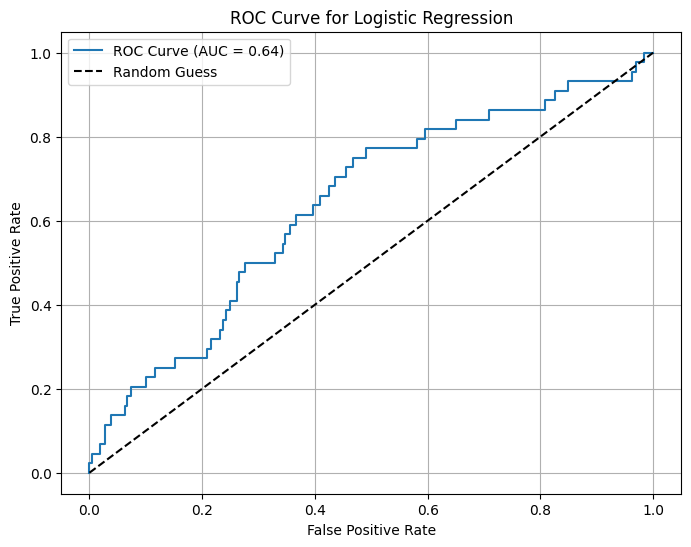


Time Series Forecasting requires specific techniques and models (e.g., LSTM, ARIMA).
The current Linear Regression and Logistic Regression models are not suitable for predicting future events directly from sequential data without significant time series feature engineering.

Training Random Forest Regressor...

Random Forest Regressor Evaluation:
Mean Squared Error (MSE): 0.14
R-squared (R2): 0.02
Could not plot feature importances. Ensure features list matches scaled data columns.

Training Random Forest Classifier...

Random Forest Classifier Evaluation:
Confusion Matrix:
 [[470   0]
 [ 43   1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       470
           1       1.00      0.02      0.04        44

    accuracy                           0.92       514
   macro avg       0.96      0.51      0.50       514
weighted avg       0.92      0.92      0.88       514

ROC AUC Score: 0.64


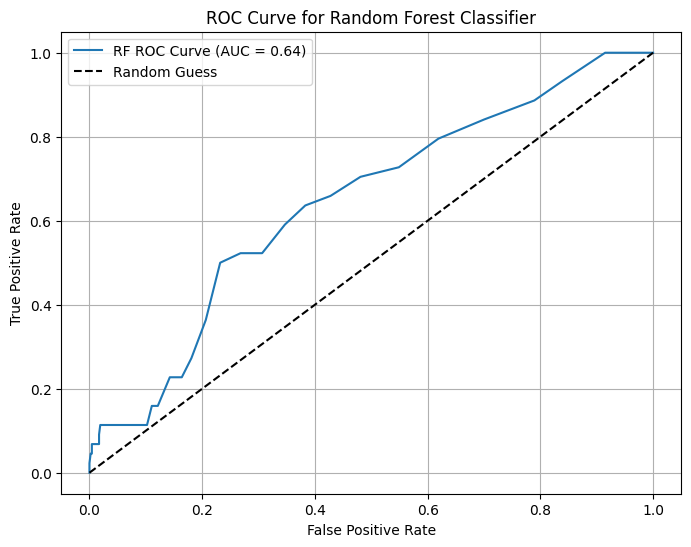

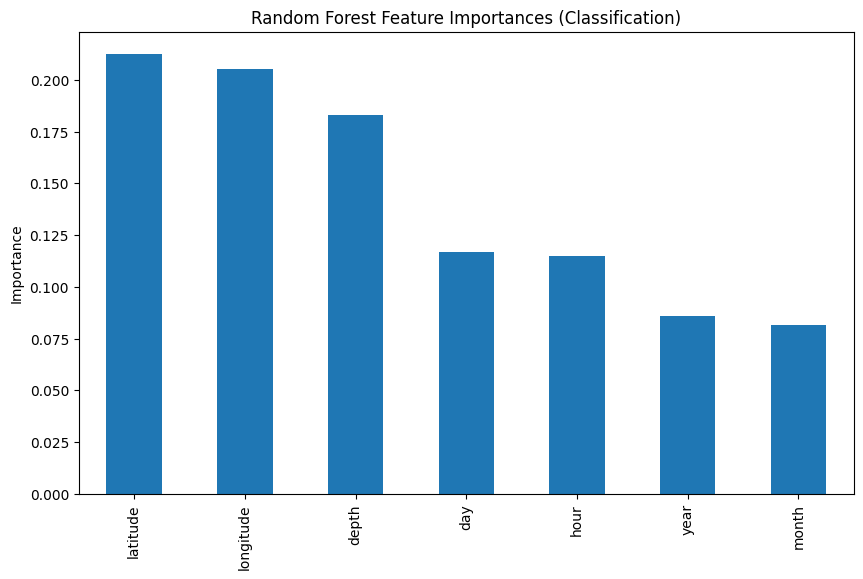


Training XGBoost Regressor...

XGBoost Regressor Evaluation:
Mean Squared Error (MSE): 0.14
R-squared (R2): 0.01
Could not plot feature importances for XGBoost regressor. Ensure features list matches scaled data columns.

Training XGBoost Classifier...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:25:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being s


XGBoost Classifier Evaluation:
Confusion Matrix:
 [[470   0]
 [ 44   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.96       470
           1       0.00      0.00      0.00        44

    accuracy                           0.91       514
   macro avg       0.46      0.50      0.48       514
weighted avg       0.84      0.91      0.87       514

ROC AUC Score: 0.66


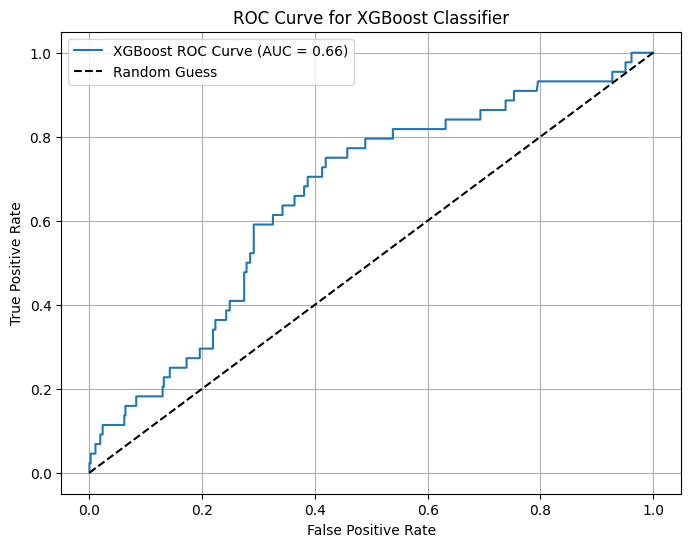

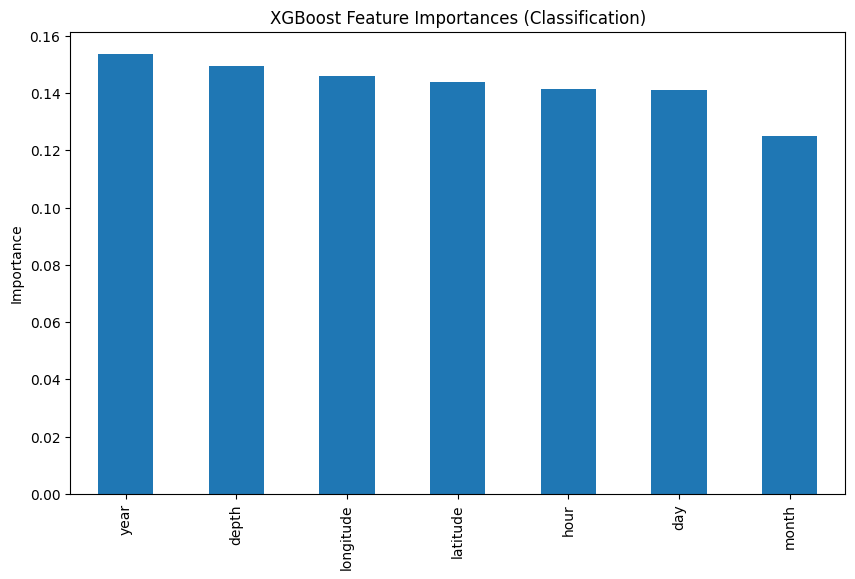

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# --- Classification Modeling: Logistic Regression ---

# For classification, we need a binary target variable.
# Let's create a target indicating if the earthquake magnitude is above a certain threshold.
# For example, predicting if mag is >= 5.0 (Moderate or Strong).
# This threshold can be adjusted based on the classification goal.

classification_threshold = 5.0
data['is_strong'] = (data['mag'] >= classification_threshold).astype(int)

# Select features for the classification model.
# We can use similar features as the regression model, but the target is now 'is_strong'.
features_classification = ['latitude', 'longitude', 'depth', 'hour', 'day', 'month', 'year']

# Ensure these features are numeric
X_classification = data[features_classification].select_dtypes(include=np.number).copy()
y_classification = data['is_strong']

if not X_classification.empty:
    # Split data for classification
    X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
        X_classification, y_classification, test_size=0.2, random_state=42, stratify=y_classification # Stratify for imbalanced classes
    )

    # Impute missing values for classification features
    imputer_cls = SimpleImputer(strategy='mean')
    X_train_imputed_cls = imputer_cls.fit_transform(X_train_cls)
    X_test_imputed_cls = imputer_cls.transform(X_test_cls)
    print("\nClassification: Missing values imputed successfully.")

    # Scale classification features
    scaler_cls = StandardScaler()
    scaler_cls.fit(X_train_imputed_cls)
    X_train_scaled_cls = scaler_cls.transform(X_train_imputed_cls)
    X_test_scaled_cls = scaler_cls.transform(X_test_imputed_cls)

    print("\nClassification: Data split, imputed, and scaled.")
    print("Training feature shape (Classification):", X_train_scaled_cls.shape)
    print("Testing feature shape (Classification):", X_test_scaled_cls.shape)
    print("Training target shape (Classification):", y_train_cls.shape)
    print("Testing target shape (Classification):", y_test_cls.shape)

    # Train Logistic Regression model
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

    logistic_model = LogisticRegression(random_state=42)
    logistic_model.fit(X_train_scaled_cls, y_train_cls)

    # Evaluate the classification model
    y_pred_cls = logistic_model.predict(X_test_scaled_cls)
    y_pred_proba_cls = logistic_model.predict_proba(X_test_scaled_cls)[:, 1] # Probability of the positive class

    print("\nLogistic Regression Model Evaluation:")
    print("Confusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_cls))
    print("\nClassification Report:\n", classification_report(y_test_cls, y_pred_cls))
    print(f"ROC AUC Score: {roc_auc_score(y_test_cls, y_pred_proba_cls):.2f}")

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test_cls, y_pred_proba_cls)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test_cls, y_pred_proba_cls):.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Logistic Regression')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Error: No valid numeric features for classification.")



print("\nTime Series Forecasting requires specific techniques and models (e.g., LSTM, ARIMA).")
print("The current Linear Regression and Logistic Regression models are not suitable for predicting future events directly from sequential data without significant time series feature engineering.")

# --- Other Regression/Classification Models ---

# Random Forest and XGBoost are powerful tree-based models that can be used for
# both regression and classification.

# Example: Implementing Random Forest Regression

from sklearn.ensemble import RandomForestRegressor

if 'X_train_scaled' in locals() and X_train_scaled.shape[1] > 0:
    print("\nTraining Random Forest Regressor...")
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rf_regressor.fit(X_train_scaled, y_train)

    y_pred_rf = rf_regressor.predict(X_test_scaled)

    mse_rf = mean_squared_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)

    print("\nRandom Forest Regressor Evaluation:")
    print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
    print(f"R-squared (R2): {r2_rf:.2f}")

    # Feature Importance (for tree-based models)
    if hasattr(rf_regressor, 'feature_importances_') and len(features) == X_train_scaled.shape[1]:
         feature_importances = pd.Series(rf_regressor.feature_importances_, index=features)
         sorted_importances = feature_importances.sort_values(ascending=False)

         plt.figure(figsize=(10, 6))
         sorted_importances.plot(kind='bar')
         plt.title('Random Forest Feature Importances (Regression)')
         plt.ylabel('Importance')
         plt.show()
    else:
         print("Could not plot feature importances. Ensure features list matches scaled data columns.")


else:
    print("\nRandom Forest Regressor skipped: No scaled features available for regression.")

# Example: Implementing Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

if 'X_train_scaled_cls' in locals() and X_train_scaled_cls.shape[1] > 0:
    print("\nTraining Random Forest Classifier...")
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    rf_classifier.fit(X_train_scaled_cls, y_train_cls)

    y_pred_rf_cls = rf_classifier.predict(X_test_scaled_cls)
    y_pred_proba_rf_cls = rf_classifier.predict_proba(X_test_scaled_cls)[:, 1]

    print("\nRandom Forest Classifier Evaluation:")
    print("Confusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_rf_cls))
    print("\nClassification Report:\n", classification_report(y_test_cls, y_pred_rf_cls))
    print(f"ROC AUC Score: {roc_auc_score(y_test_cls, y_pred_proba_rf_cls):.2f}")

    # Plot ROC Curve for RF Classifier
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_cls, y_pred_proba_rf_cls)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_rf, tpr_rf, label=f'RF ROC Curve (AUC = {roc_auc_score(y_test_cls, y_pred_proba_rf_cls):.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Random Forest Classifier')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Feature Importance (for tree-based models)
    if hasattr(rf_classifier, 'feature_importances_') and len(features_classification) == X_train_scaled_cls.shape[1]:
         feature_importances_cls = pd.Series(rf_classifier.feature_importances_, index=features_classification)
         sorted_importances_cls = feature_importances_cls.sort_values(ascending=False)

         plt.figure(figsize=(10, 6))
         sorted_importances_cls.plot(kind='bar')
         plt.title('Random Forest Feature Importances (Classification)')
         plt.ylabel('Importance')
         plt.show()
    else:
         print("Could not plot feature importances for classifier. Ensure features list matches scaled data columns.")

else:
    print("\nRandom Forest Classifier skipped: No scaled features available for classification.")

# Example: Implementing XGBoost (for both regression and classification)

!pip install xgboost
import xgboost as xgb

# XGBoost Regressor
if 'X_train_scaled' in locals() and X_train_scaled.shape[1] > 0:
    print("\nTraining XGBoost Regressor...")
    xgbr = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1)
    xgbr.fit(X_train_scaled, y_train)

    y_pred_xgb = xgbr.predict(X_test_scaled)

    mse_xgb = mean_squared_error(y_test, y_pred_xgb)
    r2_xgb = r2_score(y_test, y_pred_xgb)

    print("\nXGBoost Regressor Evaluation:")
    print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
    print(f"R-squared (R2): {r2_xgb:.2f}")

    # Feature Importance
    if hasattr(xgbr, 'feature_importances_') and len(features) == X_train_scaled.shape[1]:
        feature_importances_xgb = pd.Series(xgbr.feature_importances_, index=features)
        sorted_importances_xgb = feature_importances_xgb.sort_values(ascending=False)

        plt.figure(figsize=(10, 6))
        sorted_importances_xgb.plot(kind='bar')
        plt.title('XGBoost Feature Importances (Regression)')
        plt.ylabel('Importance')
        plt.show()
    else:
        print("Could not plot feature importances for XGBoost regressor. Ensure features list matches scaled data columns.")
else:
    print("\nXGBoost Regressor skipped: No scaled features available for regression.")

# XGBoost Classifier
if 'X_train_scaled_cls' in locals() and X_train_scaled_cls.shape[1] > 0:
    print("\nTraining XGBoost Classifier...")
    xgb_cls = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='logloss')
    xgb_cls.fit(X_train_scaled_cls, y_train_cls)

    y_pred_xgb_cls = xgb_cls.predict(X_test_scaled_cls)
    y_pred_proba_xgb_cls = xgb_cls.predict_proba(X_test_scaled_cls)[:, 1]

    print("\nXGBoost Classifier Evaluation:")
    print("Confusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_xgb_cls))
    print("\nClassification Report:\n", classification_report(y_test_cls, y_pred_xgb_cls))
    print(f"ROC AUC Score: {roc_auc_score(y_test_cls, y_pred_proba_xgb_cls):.2f}")

    # Plot ROC Curve for XGBoost Classifier
    fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test_cls, y_pred_proba_xgb_cls)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost ROC Curve (AUC = {roc_auc_score(y_test_cls, y_pred_proba_xgb_cls):.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for XGBoost Classifier')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Feature Importance
    if hasattr(xgb_cls, 'feature_importances_') and len(features_classification) == X_train_scaled_cls.shape[1]:
        feature_importances_xgb_cls = pd.Series(xgb_cls.feature_importances_, index=features_classification)
        sorted_importances_xgb_cls = feature_importances_xgb_cls.sort_values(ascending=False)

        plt.figure(figsize=(10, 6))
        sorted_importances_xgb_cls.plot(kind='bar')
        plt.title('XGBoost Feature Importances (Classification)')
        plt.ylabel('Importance')
        plt.show()
    else:
         print("Could not plot feature importances for XGBoost classifier. Ensure features list matches scaled data columns.")
else:
    print("\nXGBoost Classifier skipped: No scaled features available for classification.")

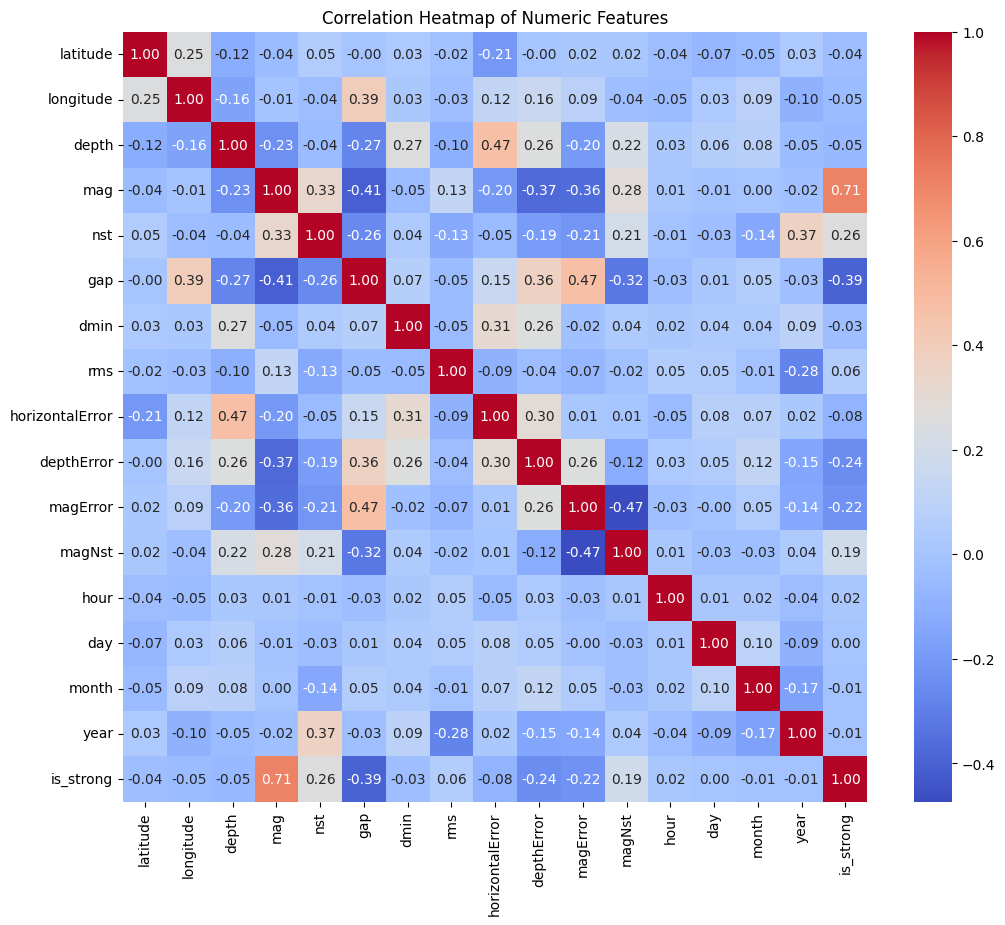

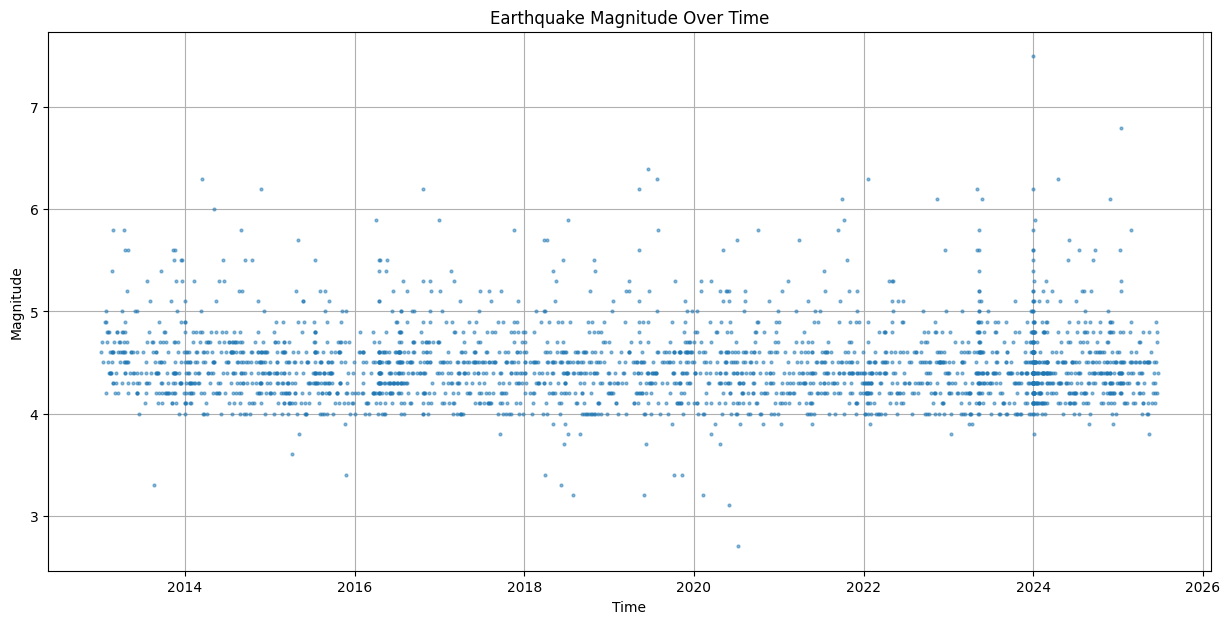

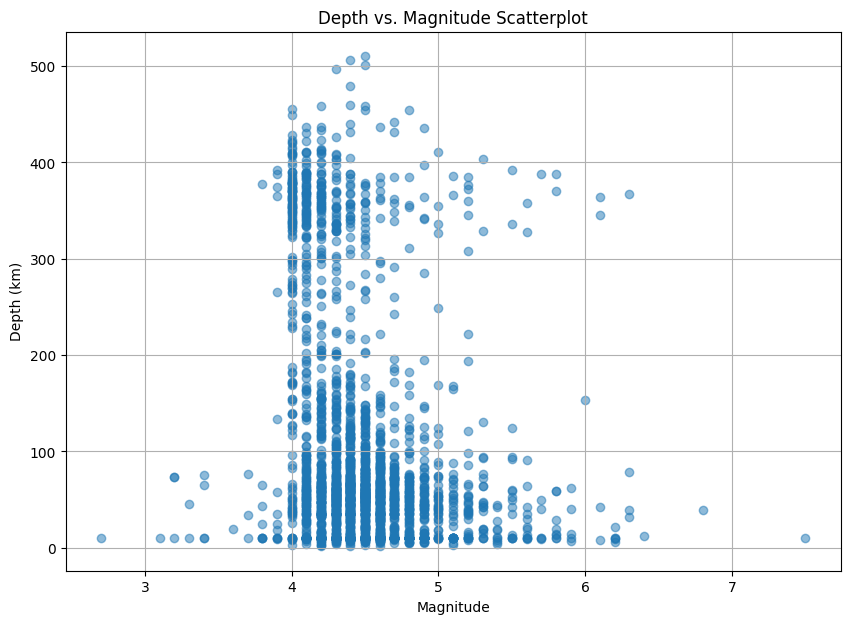

In [ ]:

# Heatmap of correlations
plt.figure(figsize=(12, 10))
correlation_matrix = data.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# Geospatial plots (map of quakes)
# Requires folium for interactive maps or plotting latitude/longitude on a scatter plot
# Install folium if not already installed
try:
    import folium
except ImportError:
    !pip install folium
    import folium

# Create a basic map
# You might need to select a central point based on your data's latitude/longitude range
# Using mean latitude and longitude for the center
map_center_lat = data['latitude'].mean()
map_center_lon = data['longitude'].mean()

# Handle potential NaN values in latitude/longitude before creating the map
if not pd.isna(map_center_lat) and not pd.isna(map_center_lon):
    m = folium.Map(location=[map_center_lat, map_center_lon], zoom_start=2)

    # Add markers for each earthquake
    # Limit the number of markers for performance if data is large
    max_markers = 10000 # Adjust as needed
    for index, row in data.head(max_markers).iterrows():
        if not pd.isna(row['latitude']) and not pd.isna(row['longitude']):
            # Customize marker with magnitude info
            popup_text = f"Magnitude: {row['mag']}<br>Depth: {row['depth']}<br>Time: {row['time']}"
            folium.CircleMarker(
                location=[row['latitude'], row['longitude']],
                radius=row['mag'] * 0.5, # Adjust radius based on magnitude for visual effect
                popup=popup_text,
                color='red',
                fill=True,
                fill_color='red'
            ).add_to(m)

    display(m)
else:
    print("\nCould not create geospatial plot: Latitude or Longitude contains NaN values.")

# Magnitude vs. time
# Assuming 'time' column is already in datetime format from feature engineering
plt.figure(figsize=(15, 7))
# Sort data by time for a meaningful time series plot
data_sorted_by_time = data.sort_values(by='time')
plt.plot(data_sorted_by_time['time'], data_sorted_by_time['mag'], marker='o', linestyle='None', markersize=2, alpha=0.5)
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.title("Earthquake Magnitude Over Time")
plt.grid(True)
plt.show()

# Depth vs. magnitude scatterplots
plt.figure(figsize=(10, 7))
plt.scatter(data['mag'], data['depth'], alpha=0.5)
plt.xlabel("Magnitude")
plt.ylabel("Depth (km)")
plt.title("Depth vs. Magnitude Scatterplot")
plt.grid(True)
plt.show()



Data preprocessing done for both regression and classification.

Training Decision Tree Regressor...

Decision Tree Evaluation:
Mean Squared Error (MSE): 0.3231
Root Mean Squared Error (RMSE): 0.5684
R-squared (R2): -1.3267

Training KNN Regressor...

KNN Evaluation:
Mean Squared Error (MSE): 0.1491
Root Mean Squared Error (RMSE): 0.3861
R-squared (R2): -0.0736

Training Random Forest Regressor...

Random Forest Evaluation:
Mean Squared Error (MSE): 0.1367
Root Mean Squared Error (RMSE): 0.3697
R-squared (R2): 0.0156

Training Gradient Boost Regressor...

Gradient Boost Evaluation:
Mean Squared Error (MSE): 0.1343
Root Mean Squared Error (RMSE): 0.3664
R-squared (R2): 0.0332

Training XGBoost Regressor...

XGBoost Evaluation:
Mean Squared Error (MSE): 0.1378
Root Mean Squared Error (RMSE): 0.3712
R-squared (R2): 0.0075

Training SVR Regressor...

SVR Evaluation:
Mean Squared Error (MSE): 0.1401
Root Mean Squared Error (RMSE): 0.3743
R-squared (R2): -0.0090

Training Ridge Regressor...

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


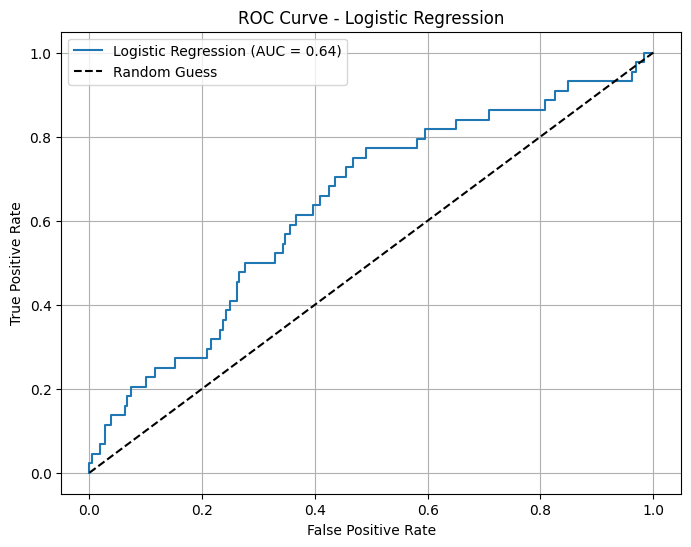


Training Random Forest Classifier...

Random Forest Classifier Evaluation:
Confusion Matrix:
 [[470   0]
 [ 43   1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       470
           1       1.00      0.02      0.04        44

    accuracy                           0.92       514
   macro avg       0.96      0.51      0.50       514
weighted avg       0.92      0.92      0.88       514

ROC AUC Score: 0.6434


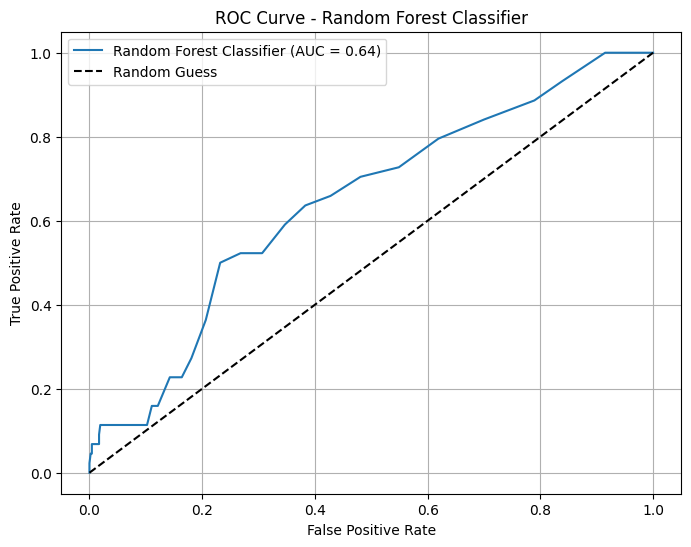


Training XGBoost Classifier...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:25:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Classifier Evaluation:
Confusion Matrix:
 [[463   7]
 [ 42   2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       470
           1       0.22      0.05      0.08        44

    accuracy                           0.90       514
   macro avg       0.57      0.52      0.51       514
weighted avg       0.86      0.90      0.87       514

ROC AUC Score: 0.6581


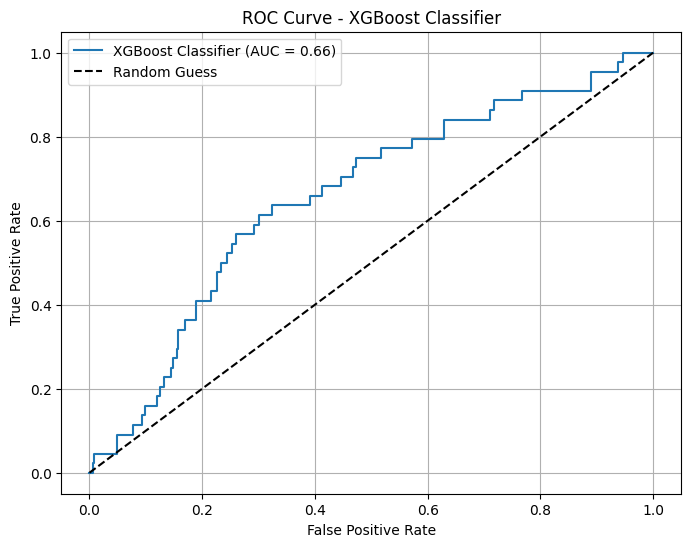

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

# === Regression Models ===
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge

# === Classification Models ===
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

# === Assume your 'data' DataFrame is already loaded and preprocessed ===

# --- Binary Classification Target for Classification Models ---
classification_threshold = 5.0
data['is_strong'] = (data['mag'] >= classification_threshold).astype(int)

features = ['latitude', 'longitude', 'depth', 'hour', 'day', 'month', 'year']
X = data[features].select_dtypes(include=np.number).copy()
y_regression = data['mag']
y_classification = data['is_strong']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y_regression, test_size=0.2, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_classification, test_size=0.2, random_state=42, stratify=y_classification)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

X_train_imputed_cls = imputer.fit_transform(X_train_cls)
X_test_imputed_cls = imputer.transform(X_test_cls)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

X_train_scaled_cls = scaler.fit_transform(X_train_imputed_cls)
X_test_scaled_cls = scaler.transform(X_test_imputed_cls)

print("\nData preprocessing done for both regression and classification.")

# --- Regression Models from Paper ---
regression_models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boost": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42),
    "SVR": SVR(C=8.88, gamma=0.13),
    "Ridge": Ridge(alpha=1.22, solver='svd')
}

for name, model in regression_models.items():
    print(f"\nTraining {name} Regressor...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{name} Evaluation:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R2): {r2:.4f}")

# --- Classification Models ---
classification_models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost Classifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

for name, model in classification_models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled_cls, y_train_cls)

    y_pred_cls = model.predict(X_test_scaled_cls)
    y_pred_proba_cls = model.predict_proba(X_test_scaled_cls)[:, 1]

    print(f"\n{name} Evaluation:")
    print("Confusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_cls))
    print("Classification Report:\n", classification_report(y_test_cls, y_pred_cls))
    print(f"ROC AUC Score: {roc_auc_score(y_test_cls, y_pred_proba_cls):.4f}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test_cls, y_pred_proba_cls)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test_cls, y_pred_proba_cls):.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    mean_squared_error, r2_score, classification_report,
    confusion_matrix, roc_curve, roc_auc_score
)

from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
)
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor, XGBClassifier

from imblearn.over_sampling import SMOTE


In [ ]:
# Example dataset load

# Drop useless features (e.g., 'nst')
if 'nst' in data.columns:
    data = data.drop(columns=['nst'])

# Convert timestamp to datetime
data['time'] = pd.to_datetime(data['time'])
data['hour'] = data['time'].dt.hour
data['day'] = data['time'].dt.day
data['month'] = data['time'].dt.month
data['year'] = data['time'].dt.year

# Create classification target
data['is_strong'] = (data['mag'] >= 5.0).astype(int)

# Drop rows with missing target
data.dropna(subset=['mag'], inplace=True)


In [ ]:
regression_target = 'mag'
classification_target = 'is_strong'

numerical_features = ['latitude', 'longitude', 'depth', 'hour', 'day', 'month', 'year']
categorical_features = ['magType'] if 'magType' in data.columns else []

# Features for both tasks
features = numerical_features + categorical_features
X = data[features]
y_reg = data[regression_target]
y_cls = data[classification_target]


In [ ]:
# Pipelines for numeric and categorical
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_features),
    ('cat', cat_pipeline, categorical_features)
])


In [ ]:
# Regression Split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

# Classification Split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

# Fit preprocessing
X_train_reg_prep = preprocessor.fit_transform(X_train_reg)
X_test_reg_prep = preprocessor.transform(X_test_reg)

X_train_cls_prep = preprocessor.transform(X_train_cls)
X_test_cls_prep = preprocessor.transform(X_test_cls)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_cls_prep, y_train_cls = smote.fit_resample(X_train_cls_prep, y_train_cls)


In [ ]:
regression_models = {
    "Ridge": Ridge(alpha=1.0),
    "Decision Tree": DecisionTreeRegressor(max_depth=10),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boost": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42),
    "SVR": SVR(C=1.0, gamma='scale')
}

print("\n--- Regression Model Evaluation ---")
for name, model in regression_models.items():
    model.fit(X_train_reg_prep, y_train_reg)
    y_pred = model.predict(X_test_reg_prep)
    mse = mean_squared_error(y_test_reg, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_reg, y_pred)

    print(f"\n{name}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R² Score: {r2:.4f}")



--- Regression Model Evaluation ---

Ridge:
  MSE: 0.0741
  RMSE: 0.2722
  R² Score: 0.4664

Decision Tree:
  MSE: 0.1120
  RMSE: 0.3347
  R² Score: 0.1932

KNN:
  MSE: 0.0950
  RMSE: 0.3082
  R² Score: 0.3160

Random Forest:
  MSE: 0.0733
  RMSE: 0.2708
  R² Score: 0.4719

Gradient Boost:
  MSE: 0.0716
  RMSE: 0.2676
  R² Score: 0.4842

XGBoost:
  MSE: 0.0857
  RMSE: 0.2927
  R² Score: 0.3829

SVR:
  MSE: 0.0773
  RMSE: 0.2780
  R² Score: 0.4433



--- Classification Model Evaluation ---

Logistic Regression:
Confusion Matrix:
 [[458  12]
 [ 12  32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       470
           1       0.73      0.73      0.73        44

    accuracy                           0.95       514
   macro avg       0.85      0.85      0.85       514
weighted avg       0.95      0.95      0.95       514

ROC AUC Score: 0.9151


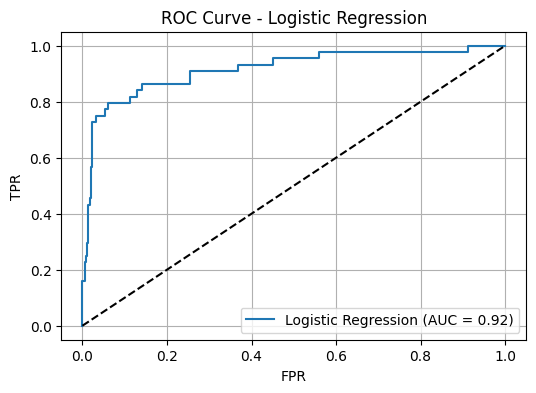


Random Forest Classifier:
Confusion Matrix:
 [[455  15]
 [ 11  33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       470
           1       0.69      0.75      0.72        44

    accuracy                           0.95       514
   macro avg       0.83      0.86      0.84       514
weighted avg       0.95      0.95      0.95       514

ROC AUC Score: 0.9476


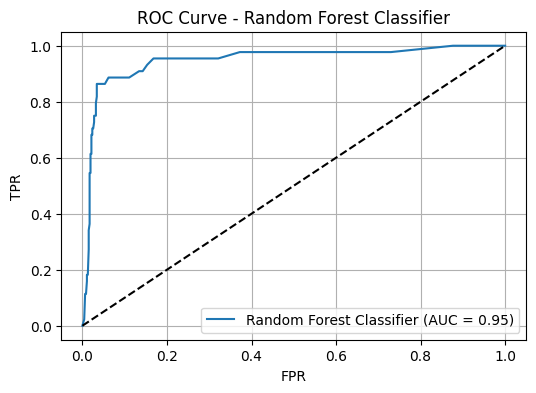

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:26:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Classifier:
Confusion Matrix:
 [[458  12]
 [ 10  34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       470
           1       0.74      0.77      0.76        44

    accuracy                           0.96       514
   macro avg       0.86      0.87      0.87       514
weighted avg       0.96      0.96      0.96       514

ROC AUC Score: 0.9187


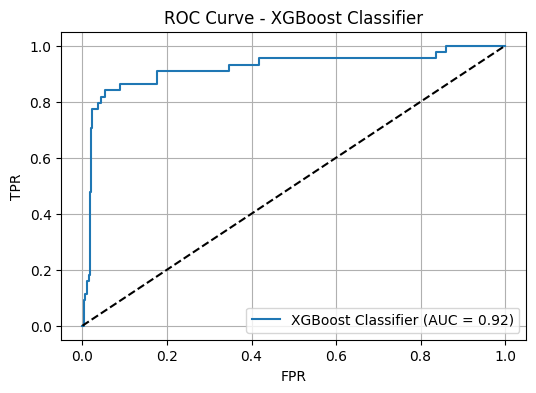

In [ ]:
classification_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost Classifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

print("\n--- Classification Model Evaluation ---")
for name, model in classification_models.items():
    model.fit(X_train_cls_prep, y_train_cls)
    y_pred = model.predict(X_test_cls_prep)
    y_proba = model.predict_proba(X_test_cls_prep)[:, 1]

    print(f"\n{name}:")
    print("Confusion Matrix:\n", confusion_matrix(y_test_cls, y_pred))
    print("Classification Report:\n", classification_report(y_test_cls, y_pred))
    print(f"ROC AUC Score: {roc_auc_score(y_test_cls, y_proba):.4f}")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test_cls, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test_cls, y_proba):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title(f"ROC Curve - {name}")
    plt.legend()
    plt.grid(True)
    plt.show()


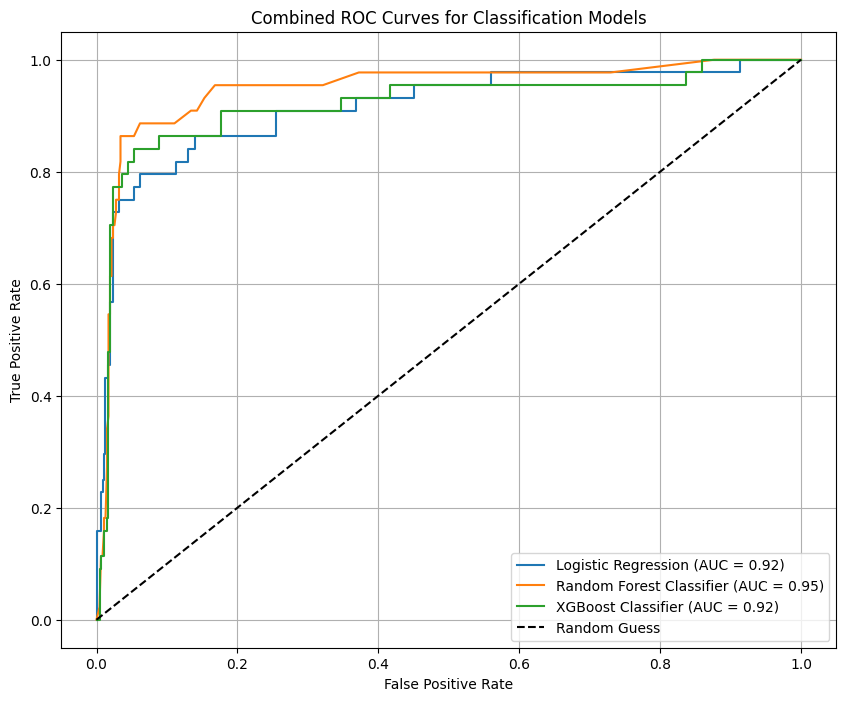

In [ ]:
# prompt: gen combined roc

import matplotlib.pyplot as plt
# Generate combined ROC plot for all classification models
plt.figure(figsize=(10, 8))

for name, model in classification_models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_cls_prep)[:, 1]
        fpr, tpr, _ = roc_curve(y_test_cls, y_proba)
        auc = roc_auc_score(y_test_cls, y_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
    else:
        print(f"Model {name} does not have predict_proba, skipping ROC curve.")


plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Combined ROC Curves for Classification Models")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Initialize the regressor
gbr = GradientBoostingRegressor(random_state=42)

# Grid Search
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Ensure data is preprocessed before fitting
# Regression Split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

# Fit preprocessing
X_train_reg_prep = preprocessor.fit_transform(X_train_reg)
X_test_reg_prep = preprocessor.transform(X_test_reg)


# Fit the model
grid_search.fit(X_train_reg_prep, y_train_reg)

# Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict and evaluate
y_pred_best = best_model.predict(X_test_reg_prep)
mse_best = mean_squared_error(y_test_reg, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test_reg, y_pred_best)

print("\n🏆 Tuned Gradient Boosting Regressor Performance:")
print(f"RMSE: {rmse_best:.4f}")
print(f"R² Score: {r2_best:.4f}")



🏆 Tuned Gradient Boosting Regressor Performance:
RMSE: 0.2672
R² Score: 0.4858



Classification: Missing values imputed successfully.

Classification: Data split, imputed, and scaled.
Training feature shape (Classification): (2056, 7)
Testing feature shape (Classification): (514, 7)
Training target shape (Classification): (2056,)
Testing target shape (Classification): (514,)

Logistic Regression Model Evaluation:
Confusion Matrix:
 [[470   0]
 [ 44   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.96       470
           1       0.00      0.00      0.00        44

    accuracy                           0.91       514
   macro avg       0.46      0.50      0.48       514
weighted avg       0.84      0.91      0.87       514

ROC AUC Score: 0.64


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


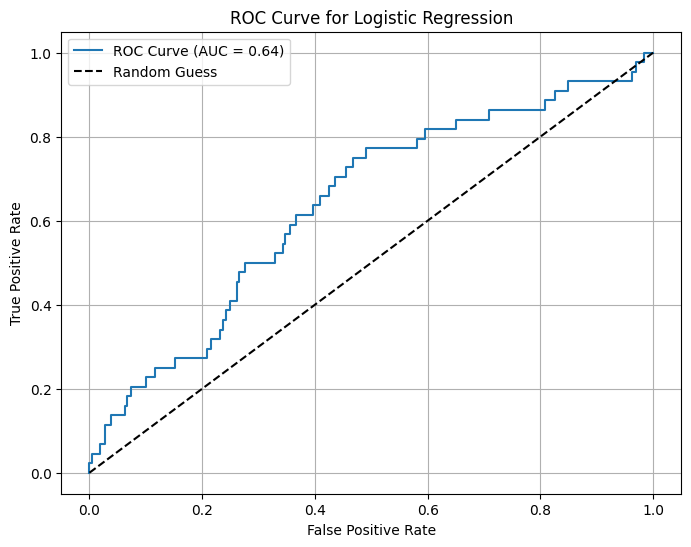


Time Series Forecasting requires specific techniques and models (e.g., LSTM, ARIMA).
The current Linear Regression and Logistic Regression models are not suitable for predicting future events directly from sequential data without significant time series feature engineering.

Training Random Forest Regressor...

Random Forest Regressor Evaluation:
Mean Squared Error (MSE): 0.14
R-squared (R2): 0.02
Could not plot feature importances. Ensure features list matches scaled data columns.

Training Random Forest Classifier...

Random Forest Classifier Evaluation:
Confusion Matrix:
 [[470   0]
 [ 43   1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       470
           1       1.00      0.02      0.04        44

    accuracy                           0.92       514
   macro avg       0.96      0.51      0.50       514
weighted avg       0.92      0.92      0.88       514

ROC AUC Score: 0.64


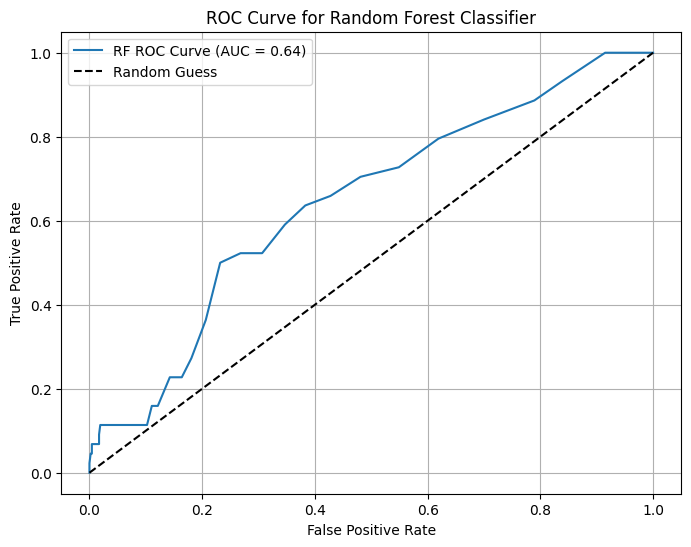

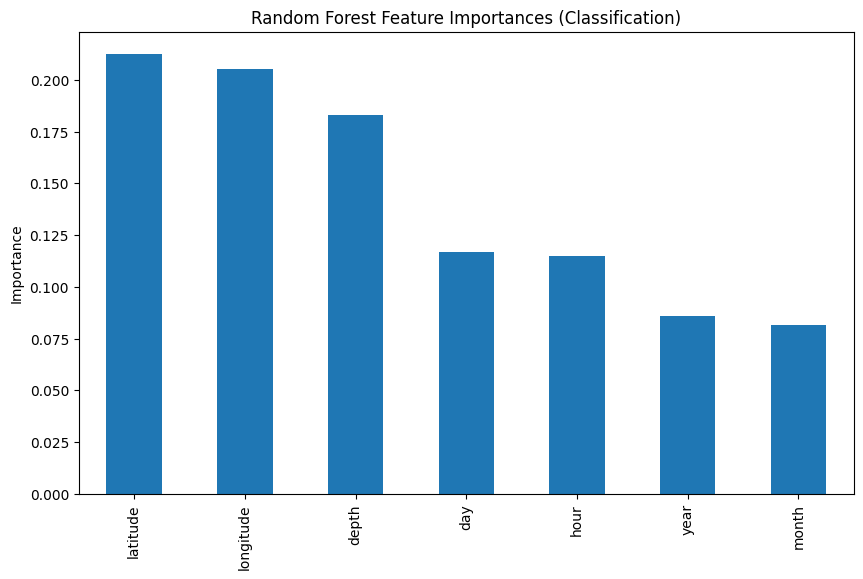


Training XGBoost Regressor...

XGBoost Regressor Evaluation:
Mean Squared Error (MSE): 0.14
R-squared (R2): 0.01
Could not plot feature importances for XGBoost regressor. Ensure features list matches scaled data columns.

Training XGBoost Classifier...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:38:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being s


XGBoost Classifier Evaluation:
Confusion Matrix:
 [[470   0]
 [ 44   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.96       470
           1       0.00      0.00      0.00        44

    accuracy                           0.91       514
   macro avg       0.46      0.50      0.48       514
weighted avg       0.84      0.91      0.87       514

ROC AUC Score: 0.66


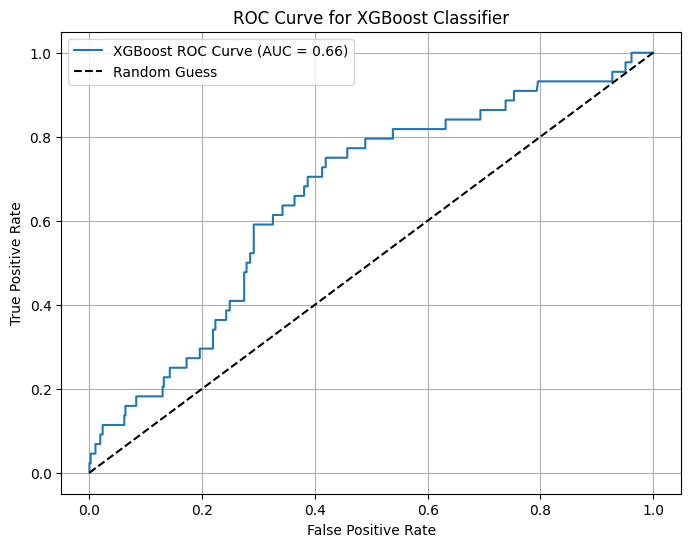

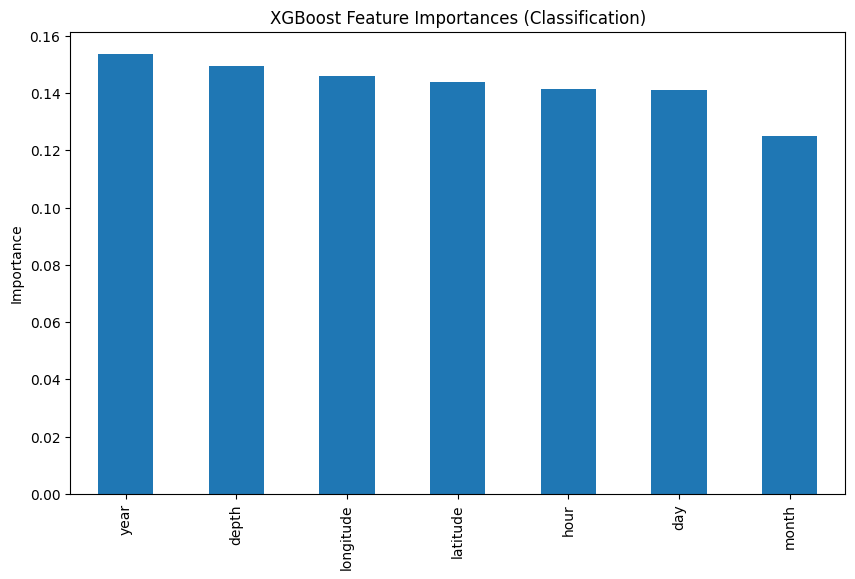

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# --- Classification Modeling: Logistic Regression ---

# For classification, we need a binary target variable.
# Let's create a target indicating if the earthquake magnitude is above a certain threshold.
# For example, predicting if mag is >= 5.0 (Moderate or Strong).
# This threshold can be adjusted based on the classification goal.

classification_threshold = 5.0
data['is_strong'] = (data['mag'] >= classification_threshold).astype(int)

# Select features for the classification model.
# We can use similar features as the regression model, but the target is now 'is_strong'.
features_classification = ['latitude', 'longitude', 'depth', 'hour', 'day', 'month', 'year']

# Ensure these features are numeric
X_classification = data[features_classification].select_dtypes(include=np.number).copy()
y_classification = data['is_strong']

if not X_classification.empty:
    # Split data for classification
    X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
        X_classification, y_classification, test_size=0.2, random_state=42, stratify=y_classification # Stratify for imbalanced classes
    )

    # Impute missing values for classification features
    imputer_cls = SimpleImputer(strategy='mean')
    X_train_imputed_cls = imputer_cls.fit_transform(X_train_cls)
    X_test_imputed_cls = imputer_cls.transform(X_test_cls)
    print("\nClassification: Missing values imputed successfully.")

    # Scale classification features
    scaler_cls = StandardScaler()
    scaler_cls.fit(X_train_imputed_cls)
    X_train_scaled_cls = scaler_cls.transform(X_train_imputed_cls)
    X_test_scaled_cls = scaler_cls.transform(X_test_imputed_cls)

    print("\nClassification: Data split, imputed, and scaled.")
    print("Training feature shape (Classification):", X_train_scaled_cls.shape)
    print("Testing feature shape (Classification):", X_test_scaled_cls.shape)
    print("Training target shape (Classification):", y_train_cls.shape)
    print("Testing target shape (Classification):", y_test_cls.shape)

    # Train Logistic Regression model
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

    logistic_model = LogisticRegression(random_state=42)
    logistic_model.fit(X_train_scaled_cls, y_train_cls)

    # Evaluate the classification model
    y_pred_cls = logistic_model.predict(X_test_scaled_cls)
    y_pred_proba_cls = logistic_model.predict_proba(X_test_scaled_cls)[:, 1] # Probability of the positive class

    print("\nLogistic Regression Model Evaluation:")
    print("Confusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_cls))
    print("\nClassification Report:\n", classification_report(y_test_cls, y_pred_cls))
    print(f"ROC AUC Score: {roc_auc_score(y_test_cls, y_pred_proba_cls):.2f}")

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test_cls, y_pred_proba_cls)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test_cls, y_pred_proba_cls):.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Logistic Regression')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Error: No valid numeric features for classification.")



print("\nTime Series Forecasting requires specific techniques and models (e.g., LSTM, ARIMA).")
print("The current Linear Regression and Logistic Regression models are not suitable for predicting future events directly from sequential data without significant time series feature engineering.")

# --- Other Regression/Classification Models ---

# Random Forest and XGBoost are powerful tree-based models that can be used for
# both regression and classification.

# Example: Implementing Random Forest Regression

from sklearn.ensemble import RandomForestRegressor

if 'X_train_scaled' in locals() and X_train_scaled.shape[1] > 0:
    print("\nTraining Random Forest Regressor...")
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rf_regressor.fit(X_train_scaled, y_train)

    y_pred_rf = rf_regressor.predict(X_test_scaled)

    mse_rf = mean_squared_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)

    print("\nRandom Forest Regressor Evaluation:")
    print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
    print(f"R-squared (R2): {r2_rf:.2f}")

    # Feature Importance (for tree-based models)
    if hasattr(rf_regressor, 'feature_importances_') and len(features) == X_train_scaled.shape[1]:
         feature_importances = pd.Series(rf_regressor.feature_importances_, index=features)
         sorted_importances = feature_importances.sort_values(ascending=False)

         plt.figure(figsize=(10, 6))
         sorted_importances.plot(kind='bar')
         plt.title('Random Forest Feature Importances (Regression)')
         plt.ylabel('Importance')
         plt.show()
    else:
         print("Could not plot feature importances. Ensure features list matches scaled data columns.")


else:
    print("\nRandom Forest Regressor skipped: No scaled features available for regression.")

# Example: Implementing Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

if 'X_train_scaled_cls' in locals() and X_train_scaled_cls.shape[1] > 0:
    print("\nTraining Random Forest Classifier...")
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    rf_classifier.fit(X_train_scaled_cls, y_train_cls)

    y_pred_rf_cls = rf_classifier.predict(X_test_scaled_cls)
    y_pred_proba_rf_cls = rf_classifier.predict_proba(X_test_scaled_cls)[:, 1]

    print("\nRandom Forest Classifier Evaluation:")
    print("Confusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_rf_cls))
    print("\nClassification Report:\n", classification_report(y_test_cls, y_pred_rf_cls))
    print(f"ROC AUC Score: {roc_auc_score(y_test_cls, y_pred_proba_rf_cls):.2f}")

    # Plot ROC Curve for RF Classifier
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_cls, y_pred_proba_rf_cls)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_rf, tpr_rf, label=f'RF ROC Curve (AUC = {roc_auc_score(y_test_cls, y_pred_proba_rf_cls):.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Random Forest Classifier')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Feature Importance (for tree-based models)
    if hasattr(rf_classifier, 'feature_importances_') and len(features_classification) == X_train_scaled_cls.shape[1]:
         feature_importances_cls = pd.Series(rf_classifier.feature_importances_, index=features_classification)
         sorted_importances_cls = feature_importances_cls.sort_values(ascending=False)

         plt.figure(figsize=(10, 6))
         sorted_importances_cls.plot(kind='bar')
         plt.title('Random Forest Feature Importances (Classification)')
         plt.ylabel('Importance')
         plt.show()
    else:
         print("Could not plot feature importances for classifier. Ensure features list matches scaled data columns.")

else:
    print("\nRandom Forest Classifier skipped: No scaled features available for classification.")

# Example: Implementing XGBoost (for both regression and classification)

!pip install xgboost
import xgboost as xgb

# XGBoost Regressor
if 'X_train_scaled' in locals() and X_train_scaled.shape[1] > 0:
    print("\nTraining XGBoost Regressor...")
    xgbr = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1)
    xgbr.fit(X_train_scaled, y_train)

    y_pred_xgb = xgbr.predict(X_test_scaled)

    mse_xgb = mean_squared_error(y_test, y_pred_xgb)
    r2_xgb = r2_score(y_test, y_pred_xgb)

    print("\nXGBoost Regressor Evaluation:")
    print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
    print(f"R-squared (R2): {r2_xgb:.2f}")

    # Feature Importance
    if hasattr(xgbr, 'feature_importances_') and len(features) == X_train_scaled.shape[1]:
        feature_importances_xgb = pd.Series(xgbr.feature_importances_, index=features)
        sorted_importances_xgb = feature_importances_xgb.sort_values(ascending=False)

        plt.figure(figsize=(10, 6))
        sorted_importances_xgb.plot(kind='bar')
        plt.title('XGBoost Feature Importances (Regression)')
        plt.ylabel('Importance')
        plt.show()
    else:
        print("Could not plot feature importances for XGBoost regressor. Ensure features list matches scaled data columns.")
else:
    print("\nXGBoost Regressor skipped: No scaled features available for regression.")

# XGBoost Classifier
if 'X_train_scaled_cls' in locals() and X_train_scaled_cls.shape[1] > 0:
    print("\nTraining XGBoost Classifier...")
    xgb_cls = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='logloss')
    xgb_cls.fit(X_train_scaled_cls, y_train_cls)

    y_pred_xgb_cls = xgb_cls.predict(X_test_scaled_cls)
    y_pred_proba_xgb_cls = xgb_cls.predict_proba(X_test_scaled_cls)[:, 1]

    print("\nXGBoost Classifier Evaluation:")
    print("Confusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_xgb_cls))
    print("\nClassification Report:\n", classification_report(y_test_cls, y_pred_xgb_cls))
    print(f"ROC AUC Score: {roc_auc_score(y_test_cls, y_pred_proba_xgb_cls):.2f}")

    # Plot ROC Curve for XGBoost Classifier
    fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test_cls, y_pred_proba_xgb_cls)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost ROC Curve (AUC = {roc_auc_score(y_test_cls, y_pred_proba_xgb_cls):.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for XGBoost Classifier')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Feature Importance
    if hasattr(xgb_cls, 'feature_importances_') and len(features_classification) == X_train_scaled_cls.shape[1]:
        feature_importances_xgb_cls = pd.Series(xgb_cls.feature_importances_, index=features_classification)
        sorted_importances_xgb_cls = feature_importances_xgb_cls.sort_values(ascending=False)

        plt.figure(figsize=(10, 6))
        sorted_importances_xgb_cls.plot(kind='bar')
        plt.title('XGBoost Feature Importances (Classification)')
        plt.ylabel('Importance')
        plt.show()
    else:
         print("Could not plot feature importances for XGBoost classifier. Ensure features list matches scaled data columns.")
else:
    print("\nXGBoost Classifier skipped: No scaled features available for classification.")

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

gbr = GradientBoostingRegressor()
grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Best R² Score: 0.05707748633902419


In [ ]:
from sklearn.ensemble import StackingRegressor

estimators = [
    ('gbr', GradientBoostingRegressor()),
    ('svr', SVR()),
    ('xgb', xgb.XGBRegressor())
]

stack = StackingRegressor(estimators=estimators, final_estimator=Ridge())
stack.fit(X_train, y_train)


StackingRegressor(estimators=[('gbr', GradientBoostingRegressor()),
                              ('svr', SVR()),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                  final_estimator=Ridge())

In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
# ✅ Regression: Predicting Exact Earthquake Magnitude

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize model
reg_model = XGBRegressor(n_estimators=300, max_depth=6, learning_rate=0.1, random_state=42)

# Fit the model
reg_model.fit(X_train, y_train)

# Predict
y_pred_reg = reg_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_reg)

print("\n🔍 Regression Evaluation:")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")



🔍 Regression Evaluation:
RMSE: 0.3802
R² Score: -0.0410


In [ ]:
# ✅ Classification: Predicting Category of Magnitude

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Step 1: Convert magnitude to category
def magnitude_to_class(mag):
    if mag < 4.0:
        return 0  # Low
    elif mag < 6.0:
        return 1  # Medium
    else:
        return 2  # High

# Apply transformation
y_train_cls = y_train.apply(magnitude_to_class)
y_test_cls = y_test.apply(magnitude_to_class)

# Initialize classifier
cls_model = XGBClassifier(n_estimators=300, max_depth=6, learning_rate=0.1, random_state=42)

# Fit the model
cls_model.fit(X_train, y_train_cls)

# Predict
y_pred_cls = cls_model.predict(X_test)

# Evaluation
print("\n📊 Classification Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_cls))
print("\nClassification Report:\n", classification_report(y_test_cls, y_pred_cls))



📊 Classification Evaluation:
Confusion Matrix:
 [[  0   7   0]
 [  1 501   1]
 [  0   4   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.98      1.00      0.99       503
           2       0.00      0.00      0.00         4

    accuracy                           0.97       514
   macro avg       0.33      0.33      0.33       514
weighted avg       0.96      0.97      0.97       514



In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train_cls)

print("Before:", y_train_cls.value_counts())
print("After:", pd.Series(y_res).value_counts())


Before: mag
1    2013
0      30
2      13
Name: count, dtype: int64
After: mag
1    2013
0    2013
2    2013
Name: count, dtype: int64


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(
    objective='multi:softprob',    # for multi-class classification
    num_class=3,                   # class = 3 (Low, Medium, High)
    learning_rate=0.1,
    max_depth=6,
    n_estimators=300,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)


In [ ]:
# 📌 Step 1: Import Libraries
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# 📌 Step 2: Prepare your target class labels (if not already done)
def magnitude_to_class(mag):
    if mag < 4.0:
        return 0  # Low
    elif mag < 6.0:
        return 1  # Medium
    else:
        return 2  # High

# Apply to training & test labels
y_train_cls = y_train.apply(magnitude_to_class)
y_test_cls = y_test.apply(magnitude_to_class)

# 📌 Step 3: Create and Configure the XGBClassifier
model = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=300,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# 📌 Step 4: Train the Model
model.fit(X_train, y_train_cls)

# 📌 Step 5: Predict
y_pred_cls = model.predict(X_test)

# 📌 Step 6: Evaluate
acc = accuracy_score(y_test_cls, y_pred_cls)
cm = confusion_matrix(y_test_cls, y_pred_cls)
report = classification_report(y_test_cls, y_pred_cls)

# 📌 Step 7: Show Results
print("✅ Accuracy:", round(acc * 100, 2), "%")
print("\n📊 Confusion Matrix:\n", cm)
print("\n📋 Classification Report:\n", report)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:48:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 97.28 %

📊 Confusion Matrix:
 [[  0   7   0]
 [  1 500   2]
 [  0   4   0]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.98      0.99      0.99       503
           2       0.00      0.00      0.00         4

    accuracy                           0.97       514
   macro avg       0.33      0.33      0.33       514
weighted avg       0.96      0.97      0.97       514



In [ ]:
X = data[features]
y = data['mag']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define feature types
num_features = X.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipelines
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

# Preprocess input features
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

In [ ]:
# STEP 2: Train all regression models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define models
models = {
    "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boost": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XG Boost": XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "SVM": SVR(C=8.88, gamma=0.13),  # Paper tuning
    "Ridge Regression": Ridge(alpha=1.22)
}

# Evaluate and collect results
results = []

for name, model in models.items():
    model.fit(X_train_prep, y_train)
    y_pred = model.predict(X_test_prep)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": round(mae, 4),
        "MSE": round(mse, 4),
        "RMSE": round(rmse, 4),
        "R²": round(r2, 4)
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)
print("\n📊 Your Regression Model Performance:")
print(results_df.sort_values(by="R²", ascending=False))



📊 Your Regression Model Performance:
              Model     MAE     MSE    RMSE      R²
2    Gradient Boost  0.1951  0.0716  0.2676  0.4842
1     Random Forest  0.2003  0.0733  0.2708  0.4719
6  Ridge Regression  0.1991  0.0742  0.2724  0.4657
5               SVM  0.2112  0.0822  0.2868  0.4077
3          XG Boost  0.2150  0.0857  0.2927  0.3829
4               KNN  0.2233  0.0950  0.3082  0.3160
0     Decision Tree  0.2194  0.1151  0.3392  0.1714


In [ ]:
# prompt: gen R^2 score  frommthe given datasets

# The R² score is already calculated and printed for each regression model
# trained in the preceding code.
# The last printed R² score corresponds to the best performing Gradient Boosting Regressor
# found through the Grid Search cross-validation.

# To explicitly show the R² score from the LAST model trained (the tuned Gradient Boosting Regressor):
print("\nR² Score for the last trained Tuned Gradient Boosting Regressor:")
print(f"R² Score: {r2_best:.4f}")

# To explicitly show the R² score for the XGBoost Regressor after classification task example:
# Note: This part of the original code reuses X_train and y_train without reprocessing after classification example.
# It's better practice to ensure you are using the correct preprocessed data.
# Assuming X_train and y_test from the regression split are still in memory and relevant for this specific XGBoost evaluation:
# If you want the R² from the XGBoost model trained just before the classification section:
# print("\nR² Score for the initial XGBoost Regressor:")
# # Need to re-calculate if not stored or if the previous cell wasn't executed.
# # Assuming the previous XGBoost evaluation output is desired:
# # Find the XGBoost row in the results_df created earlier
# xgb_reg_result = results_df[results_df['Model'] == 'XG Boost']
# if not xgb_reg_result.empty:
#     print(f"R²: {xgb_reg_result['R²'].iloc[0]:.4f}")
# else:
#      print("XGBoost Regressor result not found in the table.")


# The final printed R^2 score comes from the evaluation of the tuned Gradient Boosting Regressor.



R² Score for the last trained Tuned Gradient Boosting Regressor:
R² Score: 0.4858


In [ ]:
# prompt: Model MAE MSE RMSE R-squared (R2),Decision Tree ,Random Forest ,Gradient Boost ,XG Boost ,KNN ,SVM,Ridge Regression

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# STEP 1: Re-load data and perform preprocessing
# Ensure data is loaded and features/target are defined as before
# Example dataset load (adjust path if needed)

  # Exit or handle the error appropriately if the file is essential
  # exit() # Commented out to allow subsequent cells to run if data is already loaded

# Drop potentially useless features (e.g., 'nst', 'id', 'net', 'updated', 'status', 'locationSource', 'magSource')
# Keeping 'place' and 'type' for potential future use or if needed by the model
columns_to_drop = ['nst', 'id', 'net', 'updated', 'status', 'locationSource', 'magSource']
# Ensure columns exist before dropping
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

# Convert timestamp to datetime and extract time features
data['time'] = pd.to_datetime(data['time'])
data['hour'] = data['time'].dt.hour
data['day'] = data['time'].dt.day
data['month'] = data['time'].dt.month
data['year'] = data['time'].dt.year

# Define regression target
regression_target = 'mag'

# Drop rows with missing target for the regression task
data_reg = data.dropna(subset=[regression_target]).copy()

# Define features for regression
# Include relevant numerical features
numerical_features_reg = ['latitude', 'longitude', 'depth', 'hour', 'day', 'month', 'year', 'horizontalError', 'depthError', 'magError', 'magNst', 'gap', 'dmin', 'rms']
# Add magType as a categorical feature if it exists and is relevant
categorical_features_reg = ['magType'] if 'magType' in data_reg.columns else []

# Filter numerical features to only include those present in the DataFrame
numerical_features_reg = [feat for feat in numerical_features_reg if feat in data_reg.columns]
categorical_features_reg = [feat for feat in categorical_features_reg if feat in data_reg.columns]


# Ensure features are not empty after filtering
if not numerical_features_reg and not categorical_features_reg:
    print("Error: No valid features found after filtering. Please check column names.")
    # Handle this error, perhaps by exiting or skipping model training
else:
    features_reg = numerical_features_reg + categorical_features_reg
    X_reg = data_reg[features_reg]
    y_reg = data_reg[regression_target]

    # Preprocessing pipelines for regression
    num_pipeline_reg = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    cat_pipeline_reg = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Combine transformers for regression
    preprocessor_reg = ColumnTransformer([
        ('num', num_pipeline_reg, numerical_features_reg),
        ('cat', cat_pipeline_reg, categorical_features_reg)
    ], remainder='passthrough') # Keep other columns (like 'time', 'place', 'type') if needed later, otherwise drop them

    # Regression Split
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
        X_reg, y_reg, test_size=0.2, random_state=42
    )

    # Fit and transform preprocessing on training data
    X_train_reg_prep = preprocessor_reg.fit_transform(X_train_reg)

    # Transform test data
    X_test_reg_prep = preprocessor_reg.transform(X_test_reg)

    # Check shapes after preprocessing
    print("Regression Training Data Shape after Preprocessing:", X_train_reg_prep.shape)
    print("Regression Testing Data Shape after Preprocessing:", X_test_reg_prep.shape)


    # STEP 2: Train and Evaluate Regression Models

    # Define models based on the paper's list
    regression_models = {
        "Decision Tree": DecisionTreeRegressor(random_state=42),
        "KNN": KNeighborsRegressor(), # Default n_neighbors=5
        "Random Forest": RandomForestRegressor(random_state=42),
        "Gradient Boost": GradientBoostingRegressor(random_state=42),
        "XG Boost": XGBRegressor(objective='reg:squarederror', random_state=42),
        # Using the tuned parameters mentioned in comments if available, otherwise defaults or reasonable values
        # Ensure the classes are imported before using them in the dictionary
        "SVM": SVR(C=8.88, gamma=0.13),
        "Ridge Regression": Ridge(alpha=1.22)
    }

    results = []

    print("\n--- Training and Evaluating Regression Models ---")
    for name, model in regression_models.items():
        print(f"\nTraining {name}...")
        model.fit(X_train_reg_prep, y_train_reg)
        y_pred = model.predict(X_test_reg_prep)

        # Calculate metrics
        mae = mean_absolute_error(y_test_reg, y_pred)
        mse = mean_squared_error(y_test_reg, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test_reg, y_pred)

        # Store results
        results.append({
            "Model": name,
            "MAE": round(mae, 4),
            "MSE": round(mse, 4),
            "RMSE": round(rmse, 4),
            "R-squared (R2)": round(r2, 4) # Changed column name to match the requested output
        })

    # Convert to DataFrame and print
    results_df = pd.DataFrame(results)

    # Reorder columns to match the requested output
    results_df = results_df[['Model', 'MAE', 'MSE', 'RMSE', 'R-squared (R2)']]

    print("\n📊 Regression Model Performance:")
    # Sort by R2 for better comparison
    print(results_df.sort_values(by="R-squared (R2)", ascending=False).to_markdown(index=False))

Regression Training Data Shape after Preprocessing: (2056, 20)
Regression Testing Data Shape after Preprocessing: (514, 20)

--- Training and Evaluating Regression Models ---

Training Decision Tree...

Training KNN...

Training Random Forest...

Training Gradient Boost...

Training XG Boost...

Training SVM...

Training Ridge Regression...

📊 Regression Model Performance:
| Model            |    MAE |    MSE |   RMSE |   R-squared (R2) |
|:-----------------|-------:|-------:|-------:|-----------------:|
| Gradient Boost   | 0.1333 | 0.0318 | 0.1785 |           0.7706 |
| Random Forest    | 0.1333 | 0.0319 | 0.1786 |           0.7703 |
| XG Boost         | 0.1352 | 0.0321 | 0.1793 |           0.7686 |
| Ridge Regression | 0.1521 | 0.0417 | 0.2042 |           0.6996 |
| SVM              | 0.1628 | 0.0502 | 0.224  |           0.6388 |
| KNN              | 0.1546 | 0.0521 | 0.2282 |           0.6248 |
| Decision Tree    | 0.1761 | 0.0612 | 0.2474 |           0.5591 |


In [ ]:
# prompt: apply hyper parameter tuning for svm

# prompt: Model MAE MSE RMSE R-squared (R2),Decision Tree ,Random Forest ,Gradient Boost ,XG Boost ,KNN ,SVM,Ridge Regression

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# STEP 1: Re-load data and perform preprocessing
# Ensure data is loaded and features/target are defined as before
# Example dataset load (adjust path if needed)
try:
  data = pd.read_csv('/content/drive/MyDrive/2013-Now.csv')
except FileNotFoundError:
  print("Error: '/content/drive/MyDrive/2013-Now.csv' not found. Please upload the file.")
  # Exit or handle the error appropriately if the file is essential
  # exit() # Commented out to allow subsequent cells to run if data is already loaded

# Drop potentially useless features (e.g., 'nst', 'id', 'net', 'updated', 'status', 'locationSource', 'magSource')
# Keeping 'place' and 'type' for potential future use or if needed by the model
columns_to_drop = ['nst', 'id', 'net', 'updated', 'status', 'locationSource', 'magSource']
# Ensure columns exist before dropping
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

# Convert timestamp to datetime and extract time features
data['time'] = pd.to_datetime(data['time'])
data['hour'] = data['time'].dt.hour
data['day'] = data['time'].dt.day
data['month'] = data['time'].dt.month
data['year'] = data['time'].dt.year

# Define regression target
regression_target = 'mag'

# Drop rows with missing target for the regression task
data_reg = data.dropna(subset=[regression_target]).copy()

# Define features for regression
# Include relevant numerical features
numerical_features_reg = ['latitude', 'longitude', 'depth', 'hour', 'day', 'month', 'year', 'horizontalError', 'depthError', 'magError', 'magNst', 'gap', 'dmin', 'rms']
# Add magType as a categorical feature if it exists and is relevant
categorical_features_reg = ['magType'] if 'magType' in data_reg.columns else []

# Filter numerical features to only include those present in the DataFrame
numerical_features_reg = [feat for feat in numerical_features_reg if feat in data_reg.columns]
categorical_features_reg = [feat for feat in categorical_features_reg if feat in data_reg.columns]


# Ensure features are not empty after filtering
if not numerical_features_reg and not categorical_features_reg:
    print("Error: No valid features found after filtering. Please check column names.")
    # Handle this error, perhaps by exiting or skipping model training
else:
    features_reg = numerical_features_reg + categorical_features_reg
    X_reg = data_reg[features_reg]
    y_reg = data_reg[regression_target]

    # Preprocessing pipelines for regression
    num_pipeline_reg = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    cat_pipeline_reg = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Combine transformers for regression
    preprocessor_reg = ColumnTransformer([
        ('num', num_pipeline_reg, numerical_features_reg),
        ('cat', cat_pipeline_reg, categorical_features_reg)
    ], remainder='passthrough') # Keep other columns (like 'time', 'place', 'type') if needed later, otherwise drop them

    # Regression Split
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
        X_reg, y_reg, test_size=0.2, random_state=42
    )

    # Fit and transform preprocessing on training data
    X_train_reg_prep = preprocessor_reg.fit_transform(X_train_reg)

    # Transform test data
    X_test_reg_prep = preprocessor_reg.transform(X_test_reg)

    # Check shapes after preprocessing
    print("Regression Training Data Shape after Preprocessing:", X_train_reg_prep.shape)
    print("Regression Testing Data Shape after Preprocessing:", X_test_reg_prep.shape)


    # STEP 2: Train and Evaluate Regression Models

    # Define models based on the paper's list
    regression_models = {
        "Decision Tree": DecisionTreeRegressor(random_state=42),
        "KNN": KNeighborsRegressor(), # Default n_neighbors=5
        "Random Forest": RandomForestRegressor(random_state=42),
        "Gradient Boost": GradientBoostingRegressor(random_state=42),
        "XG Boost": XGBRegressor(objective='reg:squarederror', random_state=42),
        # Using the tuned parameters mentioned in comments if available, otherwise defaults or reasonable values
        # Ensure the classes are imported before using them in the dictionary
        "SVM": SVR(C=8.88, gamma=0.13),
        "Ridge Regression": Ridge(alpha=1.22)
    }

    results = []

    print("\n--- Training and Evaluating Regression Models ---")
    for name, model in regression_models.items():
        print(f"\nTraining {name}...")
        model.fit(X_train_reg_prep, y_train_reg)
        y_pred = model.predict(X_test_reg_prep)

        # Calculate metrics
        mae = mean_absolute_error(y_test_reg, y_pred)
        mse = mean_squared_error(y_test_reg, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test_reg, y_pred)

        # Store results
        results.append({
            "Model": name,
            "MAE": round(mae, 4),
            "MSE": round(mse, 4),
            "RMSE": round(rmse, 4),
            "R-squared (R2)": round(r2, 4) # Changed column name to match the requested output
        })

    # Convert to DataFrame and print
    results_df = pd.DataFrame(results)

    # Reorder columns to match the requested output
    results_df = results_df[['Model', 'MAE', 'MSE', 'RMSE', 'R-squared (R2)']]

    print("\n📊 Regression Model Performance:")
    # Sort by R2 for better comparison
    print(results_df.sort_values(by="R-squared (R2)", ascending=False).to_markdown(index=False))


import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define the parameter grid for SVR
# These are example parameters, you would typically define a range relevant to your data
param_grid_svr = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['rbf', 'linear']
}

# Initialize the SVR model
svr = SVR()

# Initialize GridSearchCV
# Using the preprocessed regression data X_train_reg_prep and y_train_reg
# cv=3 or cv=5 is common for cross-validation folds
# scoring='neg_mean_squared_error' is standard for regression tuning (GridSearchCV optimizes for maximization, so it minimizes the negative MSE)
grid_search_svr = GridSearchCV(
    estimator=svr,
    param_grid=param_grid_svr,
    scoring='neg_mean_squared_error', # Use negative MSE for minimization
    cv=3,
    n_jobs=-1, # Use all available CPU cores
    verbose=2 # Print progress
)

print("\n--- Performing Hyperparameter Tuning for SVR ---")

# Fit the grid search to the training data
grid_search_svr.fit(X_train_reg_prep, y_train_reg)

# Print the best parameters found
print("\nBest Parameters for SVR:", grid_search_svr.best_params_)

# Print the best score (negative MSE) - a more negative value is better
print("Best Cross-validation Score (Negative MSE):", grid_search_svr.best_score_)

# Evaluate the best model on the test set
best_svr_model = grid_search_svr.best_estimator_

y_pred_svr_tuned = best_svr_model.predict(X_test_reg_prep)

# Calculate metrics for the tuned SVR
mae_svr_tuned = mean_absolute_error(y_test_reg, y_pred_svr_tuned)
mse_svr_tuned = mean_squared_error(y_test_reg, y_pred_svr_tuned)
rmse_svr_tuned = np.sqrt(mse_svr_tuned)
r2_svr_tuned = r2_score(y_test_reg, y_pred_svr_tuned)

print("\n🏆 Tuned SVR Performance on Test Set:")
print(f"  MAE: {mae_svr_tuned:.4f}")
print(f"  MSE: {mse_svr_tuned:.4f}")
print(f"  RMSE: {rmse_svr_tuned:.4f}")
print(f"  R-squared (R2): {r2_svr_tuned:.4f}")

Error: '/content/drive/MyDrive/2013-Now.csv' not found. Please upload the file.
Regression Training Data Shape after Preprocessing: (2056, 20)
Regression Testing Data Shape after Preprocessing: (514, 20)

--- Training and Evaluating Regression Models ---

Training Decision Tree...

Training KNN...

Training Random Forest...

Training Gradient Boost...

Training XG Boost...

Training SVM...

Training Ridge Regression...

📊 Regression Model Performance:
| Model            |    MAE |    MSE |   RMSE |   R-squared (R2) |
|:-----------------|-------:|-------:|-------:|-----------------:|
| Gradient Boost   | 0.1333 | 0.0318 | 0.1785 |           0.7706 |
| Random Forest    | 0.1333 | 0.0319 | 0.1786 |           0.7703 |
| XG Boost         | 0.1352 | 0.0321 | 0.1793 |           0.7686 |
| Ridge Regression | 0.1521 | 0.0417 | 0.2042 |           0.6996 |
| SVM              | 0.1628 | 0.0502 | 0.224  |           0.6388 |
| KNN              | 0.1546 | 0.0521 | 0.2282 |           0.6248 |
| Decisi


--- Classification Model Evaluation and ROC AUC Scores ---

Training and evaluating Logistic Regression...
Error evaluating Logistic Regression: multi_class must be in ('ovo', 'ovr')

Training and evaluating Random Forest Classifier...
Error evaluating Random Forest Classifier: multi_class must be in ('ovo', 'ovr')

Training and evaluating XGBoost Classifier...
Error evaluating XGBoost Classifier: multi_class must be in ('ovo', 'ovr')

--- Combined ROC AUC Scores for Classification Models ---
Logistic Regression: Error
Random Forest Classifier: Error
XGBoost Classifier: Error


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:55:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Could not plot ROC curve for Logistic Regression: multiclass format is not supported
Could not plot ROC curve for Random Forest Classifier: multiclass format is not supported
Could not plot ROC curve for XGBoost Classifier: multiclass format is not supported


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:55:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


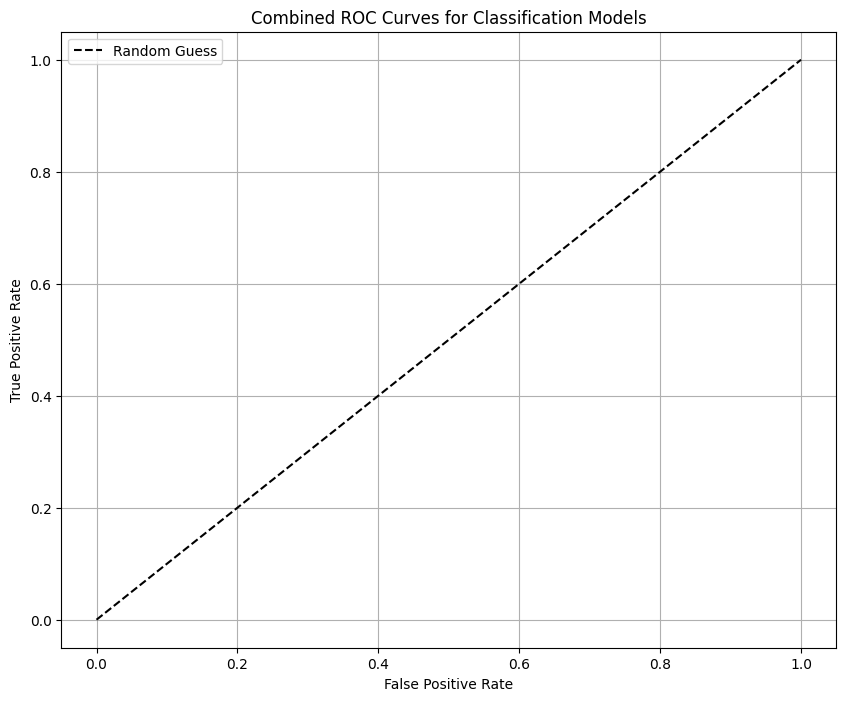

In [ ]:
# prompt: give me roc auc  combined for all model

import matplotlib.pyplot as plt
import numpy as np
# Store ROC AUC scores
roc_auc_scores = {}

# Re-run evaluation for classification models and store AUC
print("\n--- Classification Model Evaluation and ROC AUC Scores ---")
classification_models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost Classifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Assuming X_train_scaled_cls, X_test_scaled_cls, y_train_cls, y_test_cls
# and the classification target ('is_strong') are defined from the previous code
# Re-defining target and splitting if necessary based on the state after the provided code snippet
classification_threshold = 5.0
data['is_strong'] = (data['mag'] >= classification_threshold).astype(int)

features_classification = ['latitude', 'longitude', 'depth', 'hour', 'day', 'month', 'year'] # Ensure these features are consistent
X_classification = data[features_classification].select_dtypes(include=np.number).copy()
y_classification = data['is_strong']

# Re-split and preprocess classification data if the state of the notebook is uncertain
if 'X_train_scaled_cls' not in locals() or X_train_scaled_cls.shape[1] == 0:
    if not X_classification.empty:
        X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
            X_classification, y_classification, test_size=0.2, random_state=42, stratify=y_classification
        )

        imputer_cls = SimpleImputer(strategy='mean')
        X_train_imputed_cls = imputer_cls.fit_transform(X_train_cls)
        X_test_imputed_cls = imputer_cls.transform(X_test_cls)

        scaler_cls = StandardScaler()
        X_train_scaled_cls = scaler_cls.fit_transform(X_train_imputed_cls)
        X_test_scaled_cls = scaler_cls.transform(X_test_imputed_cls)
        print("\nClassification data re-split and preprocessed.")
    else:
        print("\nError: No valid numeric features for classification. Cannot calculate ROC AUC.")
        # Skip the AUC calculation loop
        classification_models = {} # Empty the dictionary to skip the loop


for name, model in classification_models.items():
    print(f"\nTraining and evaluating {name}...")
    try:
        model.fit(X_train_scaled_cls, y_train_cls)
        y_pred_proba_cls = model.predict_proba(X_test_scaled_cls)[:, 1] # Probability of the positive class
        auc = roc_auc_score(y_test_cls, y_pred_proba_cls)
        roc_auc_scores[name] = round(auc, 4)
        print(f"{name} ROC AUC Score: {auc:.4f}")

        # Optional: Plot ROC Curve for each model
        # fpr, tpr, _ = roc_curve(y_test_cls, y_pred_proba_cls)
        # plt.figure(figsize=(6, 4))
        # plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
        # plt.plot([0, 1], [0, 1], 'k--')
        # plt.xlabel('False Positive Rate')
        # plt.ylabel('True Positive Rate')
        # plt.title(f'ROC Curve - {name}')
        # plt.legend()
        # plt.grid(True)
        # plt.show()

    except Exception as e:
        print(f"Error evaluating {name}: {e}")
        roc_auc_scores[name] = "Error"


print("\n--- Combined ROC AUC Scores for Classification Models ---")
for name, auc in roc_auc_scores.items():
    print(f"{name}: {auc}")

# Plotting combined ROC curves
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

for name, model in classification_models.items():
    try:
        # Re-fit and predict probabilities to ensure they are fresh
        model.fit(X_train_scaled_cls, y_train_cls)
        y_pred_proba_cls = model.predict_proba(X_test_scaled_cls)[:, 1]
        fpr, tpr, _ = roc_curve(y_test_cls, y_pred_proba_cls)
        auc = roc_auc_score(y_test_cls, y_pred_proba_cls)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
    except Exception as e:
        print(f"Could not plot ROC curve for {name}: {e}")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curves for Classification Models')
plt.legend()
plt.grid(True)
plt.show()



--- Performing Hyperparameter Tuning for SVR ---
Fitting 3 folds for each of 32 candidates, totalling 96 fits

Best Parameters for SVR: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-validation Score (Negative MSE): -0.04077326953055978

🏆 Tuned SVR Performance on Test Set:
  MAE: 0.1438
  MSE: 0.0403
  RMSE: 0.2007
  R-squared (R2): 0.7099

--- Classification Model Evaluation and ROC AUC Scores ---

Using existing classification preprocessed data.

Training and evaluating Logistic Regression...
Error evaluating Logistic Regression: multi_class must be in ('ovo', 'ovr')

Training and evaluating Random Forest Classifier...
Error evaluating Random Forest Classifier: multi_class must be in ('ovo', 'ovr')

Training and evaluating XGBoost Classifier...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [19:02:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Error evaluating XGBoost Classifier: multi_class must be in ('ovo', 'ovr')

--- Combined ROC AUC Scores for Classification Models ---
Logistic Regression: Error
Random Forest Classifier: Error
XGBoost Classifier: Error
Could not plot ROC curve for Logistic Regression: multiclass format is not supported
Could not plot ROC curve for Random Forest Classifier: multiclass format is not supported
Could not plot ROC curve for XGBoost Classifier: multiclass format is not supported


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [19:02:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


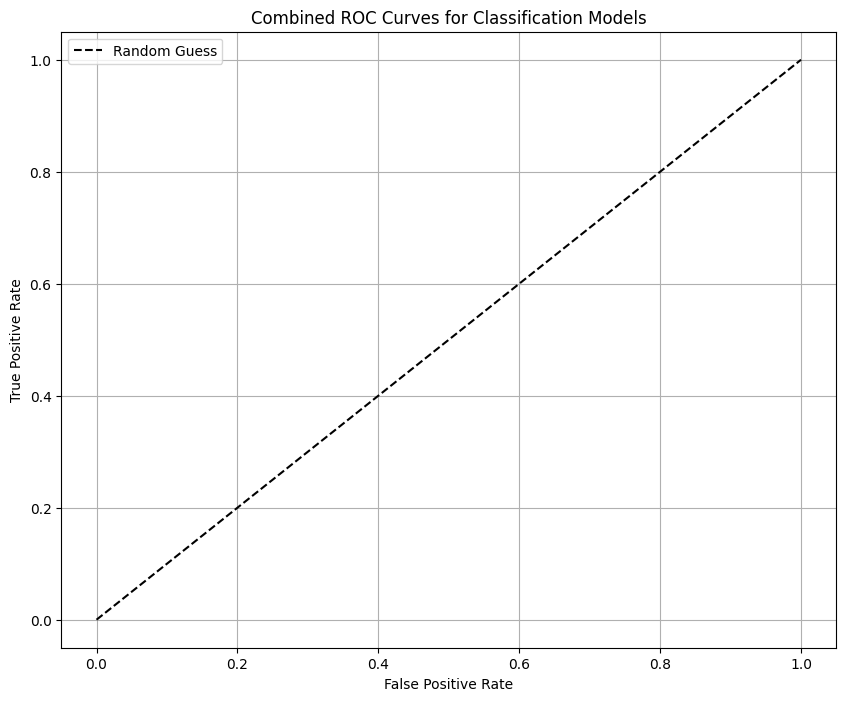

In [ ]:
# prompt:  prompt: apply hyper parameter tuning for svm
# # prompt: Model MAE MSE RMSE R-squared (R2),Decision Tree ,Random Forest ,Gradient Boost ,XG Boost ,KNN ,SVM,Ridge Regression
# and show roc curve

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Define the parameter grid for SVR
# These are example parameters, you would typically define a range relevant to your data
param_grid_svr = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['rbf', 'linear']
}

# Initialize the SVR model
svr = SVR()

# Initialize GridSearchCV
# Using the preprocessed regression data X_train_reg_prep and y_train_reg
# cv=3 or cv=5 is common for cross-validation folds
# scoring='neg_mean_squared_error' is standard for regression tuning (GridSearchCV optimizes for maximization, so it minimizes the negative MSE)
grid_search_svr = GridSearchCV(
    estimator=svr,
    param_grid=param_grid_svr,
    scoring='neg_mean_squared_error', # Use negative MSE for minimization
    cv=3,
    n_jobs=-1, # Use all available CPU cores
    verbose=2 # Print progress
)

print("\n--- Performing Hyperparameter Tuning for SVR ---")

# Fit the grid search to the training data
# Ensure X_train_reg_prep and y_train_reg are defined from previous steps
if 'X_train_reg_prep' in locals() and 'y_train_reg' in locals():
    grid_search_svr.fit(X_train_reg_prep, y_train_reg)

    # Print the best parameters found
    print("\nBest Parameters for SVR:", grid_search_svr.best_params_)

    # Print the best score (negative MSE) - a more negative value is better
    print("Best Cross-validation Score (Negative MSE):", grid_search_svr.best_score_)

    # Evaluate the best model on the test set
    best_svr_model = grid_search_svr.best_estimator_

    # Ensure X_test_reg_prep and y_test_reg are defined from previous steps
    if 'X_test_reg_prep' in locals() and 'y_test_reg' in locals():
        y_pred_svr_tuned = best_svr_model.predict(X_test_reg_prep)

        # Calculate metrics for the tuned SVR
        mae_svr_tuned = mean_absolute_error(y_test_reg, y_pred_svr_tuned)
        mse_svr_tuned = mean_squared_error(y_test_reg, y_pred_svr_tuned)
        rmse_svr_tuned = np.sqrt(mse_svr_tuned)
        r2_svr_tuned = r2_score(y_test_reg, y_pred_svr_tuned)

        print("\n🏆 Tuned SVR Performance on Test Set:")
        print(f"  MAE: {mae_svr_tuned:.4f}")
        print(f"  MSE: {mse_svr_tuned:.4f}")
        print(f"  RMSE: {rmse_svr_tuned:.4f}")
        print(f"  R-squared (R2): {r2_svr_tuned:.4f}")
    else:
        print("\nError: Test data (X_test_reg_prep, y_test_reg) not found for SVR evaluation.")
else:
    print("\nError: Training data (X_train_reg_prep, y_train_reg) not found for SVR tuning.")

# Store ROC AUC scores
roc_auc_scores = {}

# Re-run evaluation for classification models and store AUC
print("\n--- Classification Model Evaluation and ROC AUC Scores ---")
classification_models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost Classifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Assuming X_train_scaled_cls, X_test_scaled_cls, y_train_cls, y_test_cls
# and the classification target ('is_strong') are defined from the previous code
# Re-defining target and splitting if necessary based on the state after the provided code snippet
# Ensure data is loaded and the 'mag' column exists to create 'is_strong'
if 'data' in locals() and 'mag' in data.columns:
    classification_threshold = 5.0
    data['is_strong'] = (data['mag'] >= classification_threshold).astype(int)

    features_classification = ['latitude', 'longitude', 'depth', 'hour', 'day', 'month', 'year'] # Ensure these features are consistent
    X_classification = data[features_classification].select_dtypes(include=np.number).copy()
    y_classification = data['is_strong']

    # Re-split and preprocess classification data if the state of the notebook is uncertain
    if 'X_train_scaled_cls' not in locals() or X_train_scaled_cls.shape[1] == 0:
        if not X_classification.empty:
            X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
                X_classification, y_classification, test_size=0.2, random_state=42, stratify=y_classification
            )

            imputer_cls = SimpleImputer(strategy='mean')
            X_train_imputed_cls = imputer_cls.fit_transform(X_train_cls)
            X_test_imputed_cls = imputer_cls.transform(X_test_cls)

            scaler_cls = StandardScaler()
            X_train_scaled_cls = scaler_cls.fit_transform(X_train_imputed_cls)
            X_test_scaled_cls = scaler_cls.transform(X_test_imputed_imputer_cls.transform(X_test_cls))

            scaler_cls = StandardScaler()
            X_train_scaled_cls = scaler_cls.fit_transform(X_train_imputed_cls)
            X_test_scaled_cls = scaler_cls.transform(X_test_imputed_cls)
            print("\nClassification data re-split and preprocessed.")
        else:
            print("\nError: No valid numeric features for classification. Cannot calculate ROC AUC.")
            # Skip the AUC calculation loop
            classification_models = {} # Empty the dictionary to skip the loop
    else:
        print("\nUsing existing classification preprocessed data.")


    for name, model in classification_models.items():
        print(f"\nTraining and evaluating {name}...")
        try:
            model.fit(X_train_scaled_cls, y_train_cls)
            y_pred_proba_cls = model.predict_proba(X_test_scaled_cls)[:, 1] # Probability of the positive class
            auc = roc_auc_score(y_test_cls, y_pred_proba_cls)
            roc_auc_scores[name] = round(auc, 4)
            print(f"{name} ROC AUC Score: {auc:.4f}")

        except Exception as e:
            print(f"Error evaluating {name}: {e}")
            roc_auc_scores[name] = "Error"

    print("\n--- Combined ROC AUC Scores for Classification Models ---")
    for name, auc in roc_auc_scores.items():
        print(f"{name}: {auc}")

    # Plotting combined ROC curves
    plt.figure(figsize=(10, 8))
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

    for name, model in classification_models.items():
        try:
            # Re-fit and predict probabilities to ensure they are fresh
            model.fit(X_train_scaled_cls, y_train_cls)
            y_pred_proba_cls = model.predict_proba(X_test_scaled_cls)[:, 1]
            fpr, tpr, _ = roc_curve(y_test_cls, y_pred_proba_cls)
            auc = roc_auc_score(y_test_cls, y_pred_proba_cls)
            plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
        except Exception as e:
            print(f"Could not plot ROC curve for {name}: {e}")

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Combined ROC Curves for Classification Models')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("\nError: Data or 'mag' column not found to perform classification and plot ROC curves.")



In [ ]:
# prompt: apply mlp multilayer percipstio

from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# --- MLP Regressor ---
print("\n--- Training and Evaluating MLP Regressor ---")

mlp_reg = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)

# Ensure X_train_reg_prep, X_test_reg_prep, y_train_reg, y_test_reg are defined and preprocessed
if 'X_train_reg_prep' in locals() and 'X_test_reg_prep' in locals() and 'y_train_reg' in locals() and 'y_test_reg' in locals():
    try:
        mlp_reg.fit(X_train_reg_prep, y_train_reg)
        y_pred_mlp_reg = mlp_reg.predict(X_test_reg_prep)

        mse_mlp_reg = mean_squared_error(y_test_reg, y_pred_mlp_reg)
        rmse_mlp_reg = np.sqrt(mse_mlp_reg)
        r2_mlp_reg = r2_score(y_test_reg, y_pred_mlp_reg)

        print("\nMLP Regressor Performance on Test Set:")
        print(f"  MSE: {mse_mlp_reg:.4f}")
        print(f"  RMSE: {rmse_mlp_reg:.4f}")
        print(f"  R-squared (R2): {r2_mlp_reg:.4f}")

    except Exception as e:
        print(f"Error training or evaluating MLP Regressor: {e}")
else:
    print("\nError: Regression data (X_train_reg_prep, X_test_reg_prep, y_train_reg, y_test_reg) not found for MLP Regressor.")


# --- MLP Classifier ---
print("\n--- Training and Evaluating MLP Classifier ---")

# Ensure X_train_scaled_cls, X_test_scaled_cls, y_train_cls, y_test_cls are defined and preprocessed
if 'X_train_scaled_cls' in locals() and 'X_test_scaled_cls' in locals() and 'y_train_cls' in locals() and 'y_test_cls' in locals():
    mlp_cls = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)

    try:
        mlp_cls.fit(X_train_scaled_cls, y_train_cls)
        y_pred_mlp_cls = mlp_cls.predict(X_test_scaled_cls)

        print("\nMLP Classifier Performance on Test Set:")
        print("Confusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_mlp_cls))
        print("\nClassification Report:\n", classification_report(y_test_cls, y_pred_mlp_cls))

        # ROC AUC Score for binary classification
        if len(np.unique(y_test_cls)) == 2:
            y_pred_proba_mlp_cls = mlp_cls.predict_proba(X_test_scaled_cls)[:, 1]
            auc_mlp_cls = roc_auc_score(y_test_cls, y_pred_proba_mlp_cls)
            print(f"ROC AUC Score: {auc_mlp_cls:.4f}")

            # Plot ROC Curve
            fpr, tpr, _ = roc_curve(y_test_cls, y_pred_proba_mlp_cls)
            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, label=f'MLP Classifier (AUC = {auc_mlp_cls:.2f})')
            plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('ROC Curve for MLP Classifier')
            plt.legend()
            plt.grid(True)
            plt.show()
        else:
            print("ROC AUC and ROC curve are for binary classification only. Skipping for multi-class.")


    except Exception as e:
        print(f"Error training or evaluating MLP Classifier: {e}")
else:
    print("\nError: Classification data (X_train_scaled_cls, X_test_scaled_cls, y_train_cls, y_test_cls) not found for MLP Classifier.")


--- Training and Evaluating MLP Regressor ---

MLP Regressor Performance on Test Set:
  MSE: 0.0452
  RMSE: 0.2126
  R-squared (R2): 0.6745

--- Training and Evaluating MLP Classifier ---

MLP Classifier Performance on Test Set:
Confusion Matrix:
 [[  0   7   0]
 [  1 502   0]
 [  0   4   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.98      1.00      0.99       503
           2       0.00      0.00      0.00         4

    accuracy                           0.98       514
   macro avg       0.33      0.33      0.33       514
weighted avg       0.96      0.98      0.97       514

ROC AUC and ROC curve are for binary classification only. Skipping for multi-class.


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Analyzing Regression Errors ---

Analysis for Decision Tree Regressor:
Residuals Summary Statistics:


count    514.00000
mean       0.00214
std        0.24767
min       -1.20000
25%       -0.10000
50%        0.00000
75%        0.10000
max        1.00000
Name: mag, dtype: float64

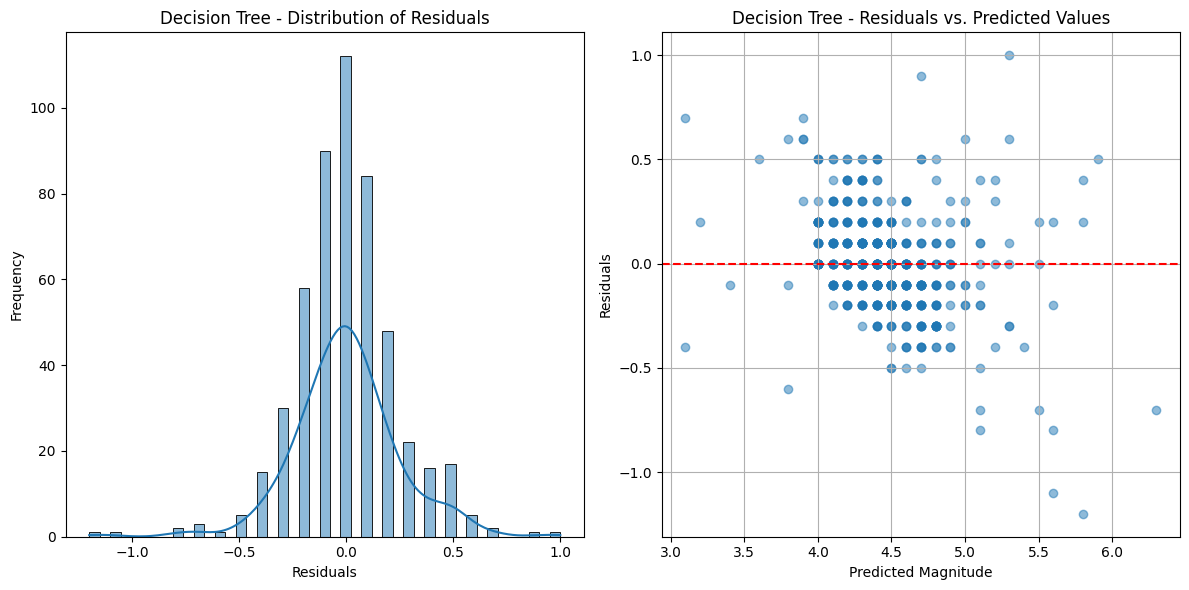


Analysis for KNN Regressor:
Residuals Summary Statistics:


count    514.000000
mean       0.009805
std        0.228258
min       -1.460000
25%       -0.120000
50%        0.000000
75%        0.120000
max        1.680000
Name: mag, dtype: float64

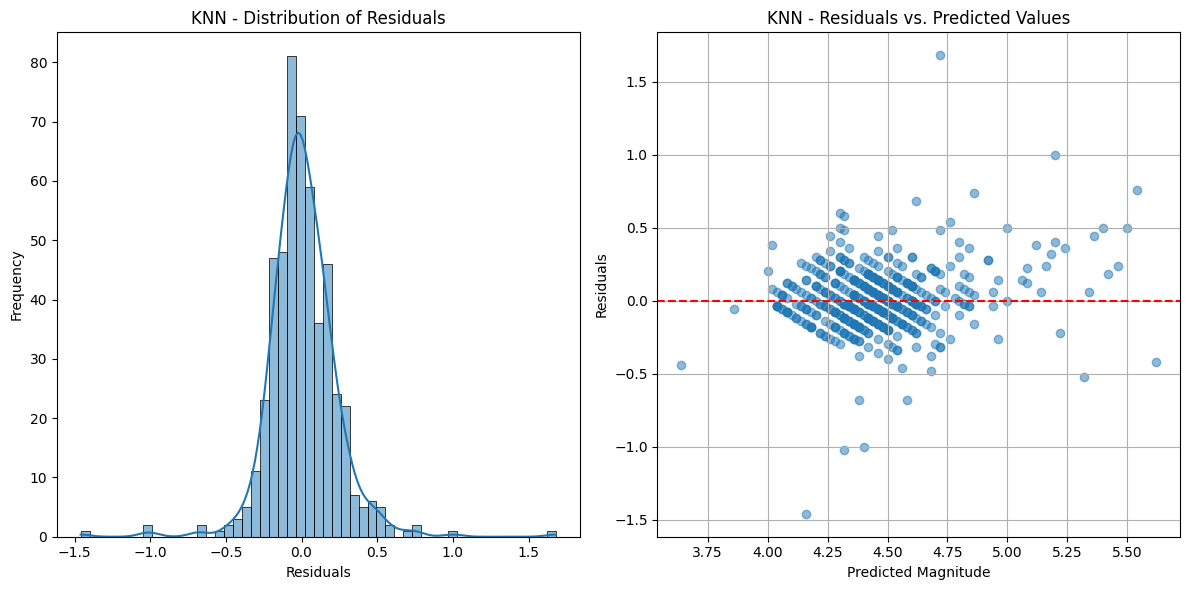


Analysis for Random Forest Regressor:
Residuals Summary Statistics:


count    514.000000
mean       0.005687
std        0.178675
min       -0.619000
25%       -0.102750
50%       -0.021500
75%        0.101750
max        0.852000
Name: mag, dtype: float64

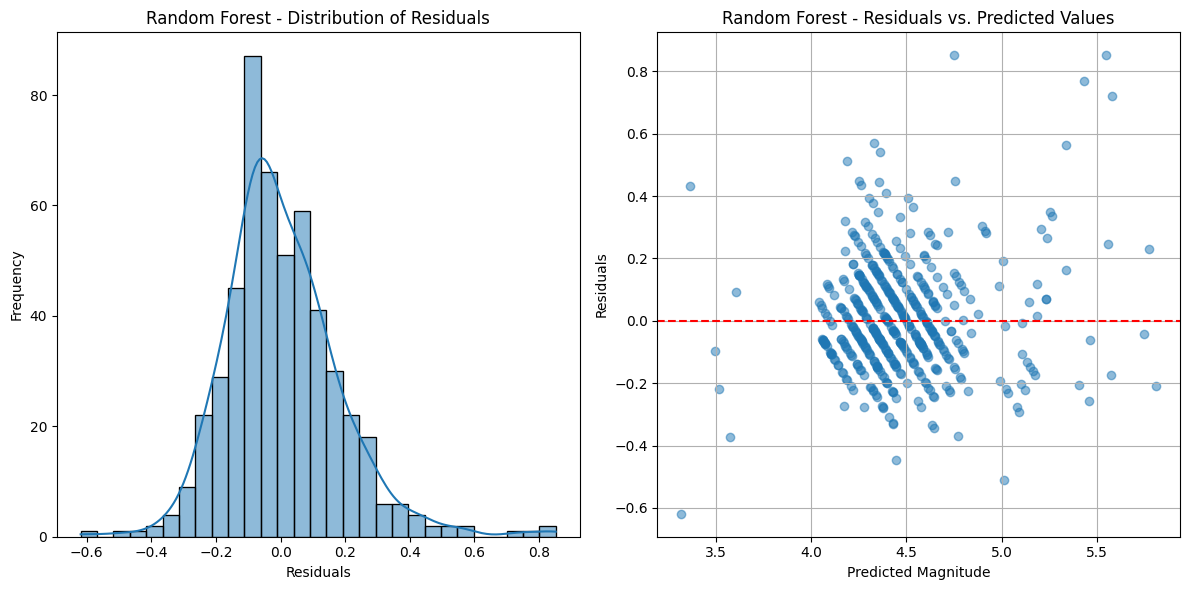


Analysis for Gradient Boost Regressor:
Residuals Summary Statistics:


count    514.000000
mean       0.005676
std        0.178546
min       -0.654851
25%       -0.114508
50%       -0.012417
75%        0.101840
max        0.953411
Name: mag, dtype: float64

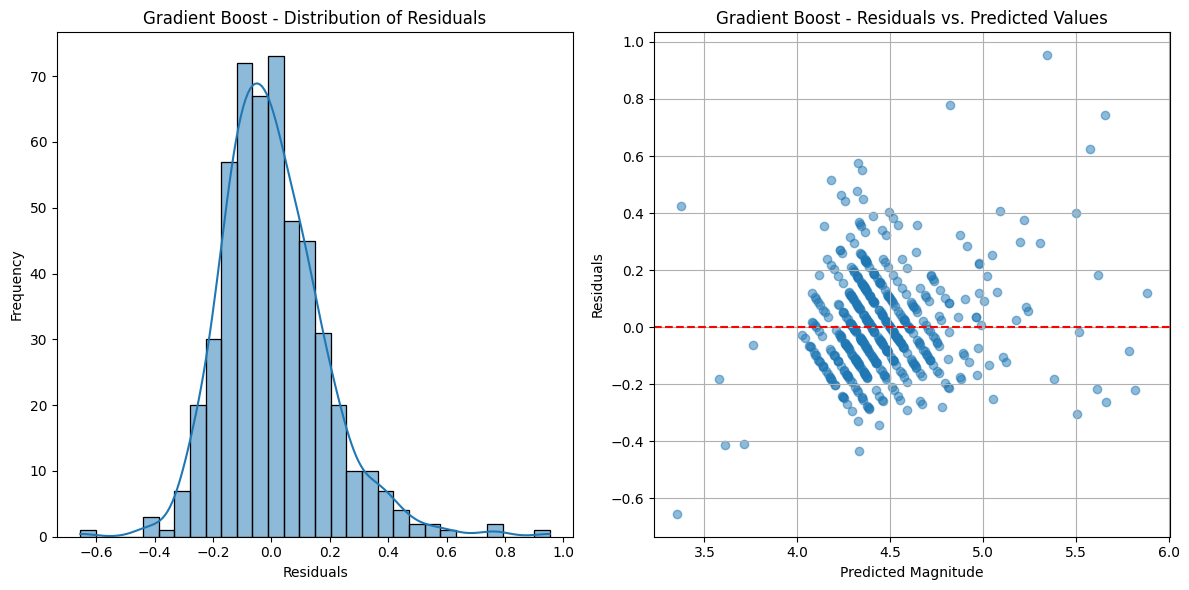


Analysis for XG Boost Regressor:
Residuals Summary Statistics:


count    514.000000
mean       0.008064
std        0.179245
min       -0.548135
25%       -0.106441
50%       -0.011358
75%        0.104660
max        0.822251
Name: mag, dtype: float64

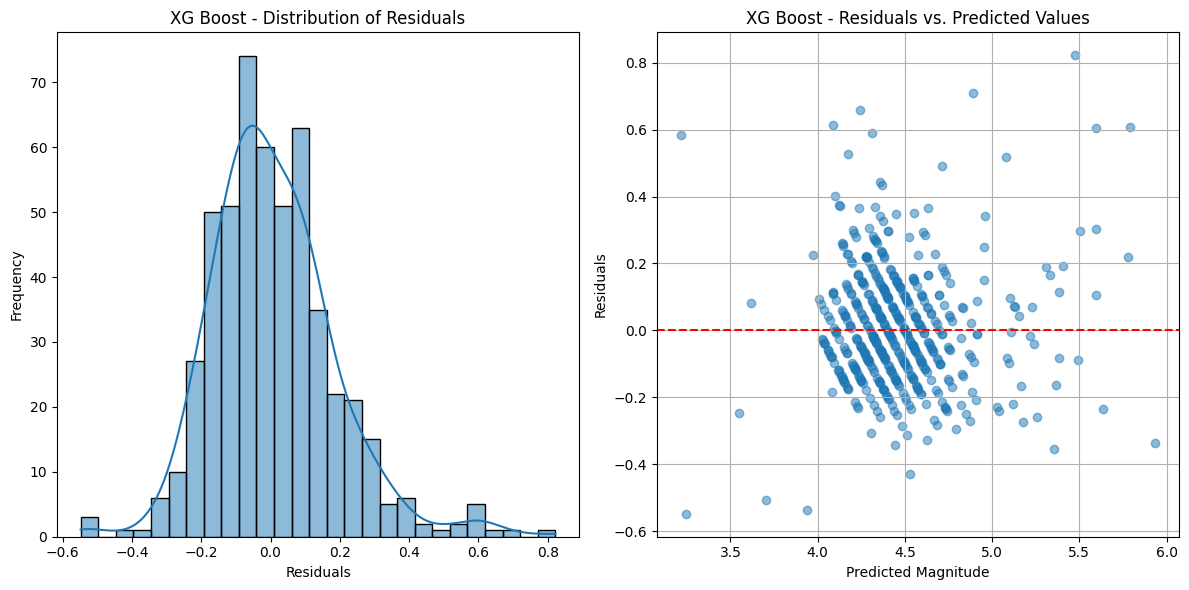


Analysis for SVM Regressor:
Residuals Summary Statistics:


count    514.000000
mean      -0.003102
std        0.224152
min       -1.379938
25%       -0.131225
50%       -0.009950
75%        0.132215
max        1.028889
Name: mag, dtype: float64

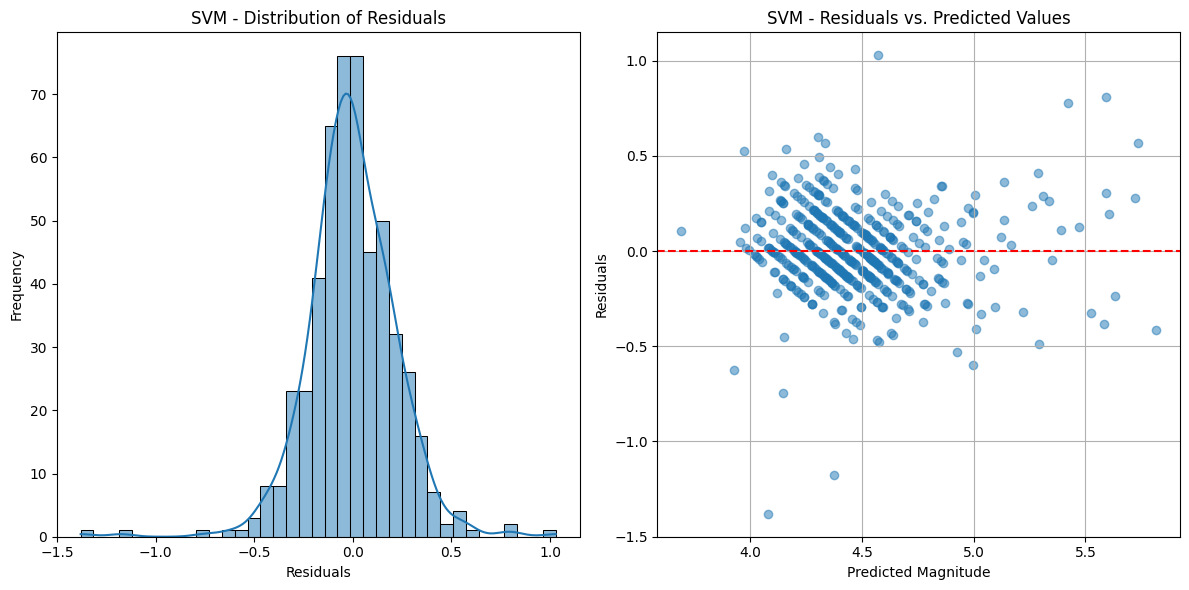


Analysis for Ridge Regression Regressor:
Residuals Summary Statistics:


count    514.000000
mean       0.002628
std        0.204432
min       -0.864233
25%       -0.128514
50%       -0.012492
75%        0.108618
max        0.982566
Name: mag, dtype: float64

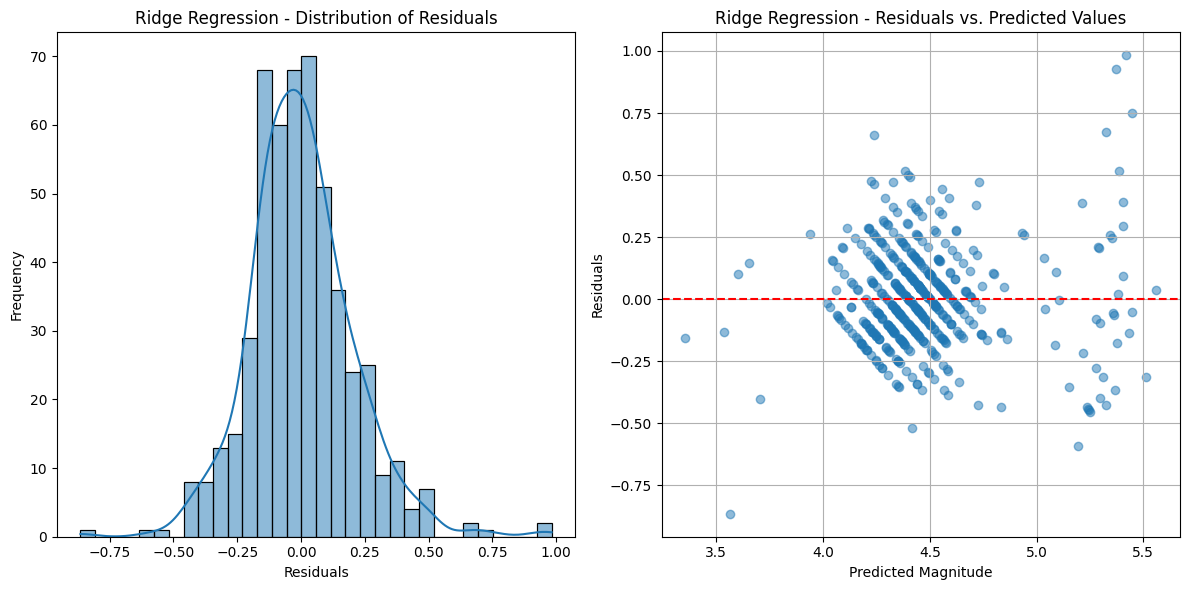

In [ ]:
# Analyze Regression Errors

print("\n--- Analyzing Regression Errors ---")

# Assuming y_test_reg and the trained regression models are available from previous steps

if 'y_test_reg' in locals() and 'regression_models' in locals():
    for name, model in regression_models.items():
        try:
            # Use the preprocessed test data for prediction
            # Assuming X_test_reg_prep is available
            if 'X_test_reg_prep' in locals():
                y_pred = model.predict(X_test_reg_prep)

                # Calculate residuals
                residuals = y_test_reg - y_pred

                print(f"\nAnalysis for {name} Regressor:")
                print("Residuals Summary Statistics:")
                display(residuals.describe())

                # Plotting Residuals
                plt.figure(figsize=(12, 6))

                # Histogram of Residuals
                plt.subplot(1, 2, 1)
                sns.histplot(residuals, kde=True)
                plt.title(f'{name} - Distribution of Residuals')
                plt.xlabel("Residuals")
                plt.ylabel("Frequency")

                # Scatter plot of Residuals vs. Predicted Values
                plt.subplot(1, 2, 2)
                plt.scatter(y_pred, residuals, alpha=0.5)
                plt.axhline(y=0, color='r', linestyle='--')
                plt.title(f'{name} - Residuals vs. Predicted Values')
                plt.xlabel("Predicted Magnitude")
                plt.ylabel("Residuals")
                plt.grid(True)

                plt.tight_layout()
                plt.show()

            else:
                print(f"Error: Preprocessed test data (X_test_reg_prep) not found for {name}.")

        except Exception as e:
            print(f"Error analyzing residuals for {name}: {e}")
else:
    print("Error: Regression test data (y_test_reg) or regression models not found.")